In [1]:
#basic python libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as m
import matplotlib.pyplot as plt
from math import isnan
from random import sample
from numpy.random import uniform


%matplotlib inline
##Import ML libraries and related dependencies
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import RFE
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


##Import Clustering libraries and related dependencies
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import silhouette_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
from scipy.cluster.hierarchy import linkage

# Reading and Understanding the Data

In [2]:
lead_scoring=pd.read_csv("Leads.csv")
lead_scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
lead_scoring.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [7]:
lead_scoring.shape

(9240, 37)

In [9]:
lead_scoring.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
lead_scoring.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [11]:
lead_scoring.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [12]:
# Checking for the duplicate values 
lead_scoring.duplicated().sum()

0

In [13]:
# Checking for the null values 
null_values=lead_scoring.isnull().sum()
null_values

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [14]:
#converting null values to percentage 
round(null_values/len(lead_scoring.index)*100)

Prospect ID                                       0.0
Lead Number                                       0.0
Lead Origin                                       0.0
Lead Source                                       0.0
Do Not Email                                      0.0
Do Not Call                                       0.0
Converted                                         0.0
TotalVisits                                       1.0
Total Time Spent on Website                       0.0
Page Views Per Visit                              1.0
Last Activity                                     1.0
Country                                          27.0
Specialization                                   16.0
How did you hear about X Education               24.0
What is your current occupation                  29.0
What matters most to you in choosing a course    29.0
Search                                            0.0
Magazine                                          0.0
Newspaper Article           

It doesn't make any sense to have columns with missing value percentahes as high as 45 and 51. Even imputing such high percentage can impact our analysis and hence we can drop them

In [16]:
col_drop = lead_scoring.isnull().sum()
col_drop = col_drop[col_drop.values/len(lead_scoring) > 0.40]
col_drop

Lead Quality                   4767
Asymmetrique Activity Index    4218
Asymmetrique Profile Index     4218
Asymmetrique Activity Score    4218
Asymmetrique Profile Score     4218
dtype: int64

In [17]:
len(col_drop)

5

In [18]:
def removeNullCol(dataframe, percent = 0.40):
    lead_scoring = dataframe.copy()
    df_shape = lead_scoring.shape
    col_names = (lead_scoring.isnull().sum()/len(lead_scoring))
    col_names = list(col_names[col_names.values > percent].index)
    lead_scoring.drop(labels = col_names, axis = 1, inplace=True)
    print("Total columns dropped : " , len(col_names))
    print("Original shape of dataframe : ", df_shape)
    print("New shape of dataframe : ", lead_scoring.shape)
    return  lead_scoring

In [20]:
lead_scoring = removeNullCol(lead_scoring, percent = 0.40)

Total columns dropped :  5
Original shape of dataframe :  (9240, 37)
New shape of dataframe :  (9240, 32)


In [22]:
round(lead_scoring.isnull().sum()/len(lead_scoring)*100, 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper 

In [23]:
lead_scoring.shape

(9240, 32)

In [24]:
lead_scoring = lead_scoring.drop(['Prospect ID', 'Lead Number'], 1)

C:\Users\dhirs\AppData\Local\Temp\ipykernel_12092\1822529718.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  lead_scoring = lead_scoring.drop(['Prospect ID', 'Lead Number'], 1)


In [25]:
# Replacing the Blank spaces to NaN 
lead_scoring = lead_scoring.replace('Select', np.nan)

In [26]:
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,...,No,No,Interested in other courses,No,No,NaN,NaN,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,...,No,No,Ringing,No,No,NaN,NaN,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,...,No,No,Ringing,No,No,NaN,Mumbai,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,...,No,No,Will revert after reading the email,No,No,NaN,Mumbai,No,No,Modified


In [27]:
lead_scoring['Lead Profile'].value_counts(dropna=False).head()

NaN                      6855
Potential Lead           1613
Other Leads               487
Student of SomeSchool     241
Lateral Student            24
Name: Lead Profile, dtype: int64

In [28]:
lead_scoring['Lead Profile'] = lead_scoring['Lead Profile'].replace(np.nan, 'Lead Level not specified')

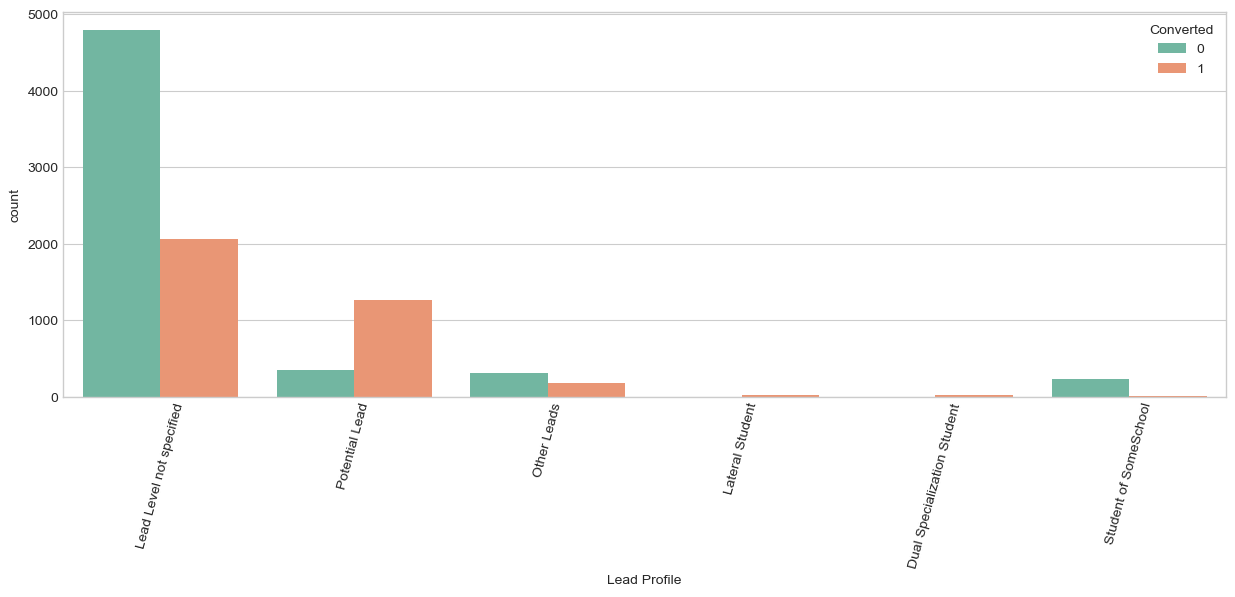

In [31]:
#PLott 'Lead Profile'
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Lead Profile', hue='Converted', data=lead_scoring, palette="Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [32]:
lead_scoring=lead_scoring.drop(['Lead Profile'],axis=1)

In [34]:
#Analyzing How did you hear about X Education column

lead_scoring['How did you hear about X Education'].value_counts(dropna=False).head()

NaN                      7250
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Name: How did you hear about X Education, dtype: int64

In [35]:
lead_scoring['How did you hear about X Education'] = lead_scoring['How did you hear about X Education'].replace(np.nan, 'Not specified')

C:\Users\dhirs\AppData\Local\Temp\ipykernel_12092\868593864.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


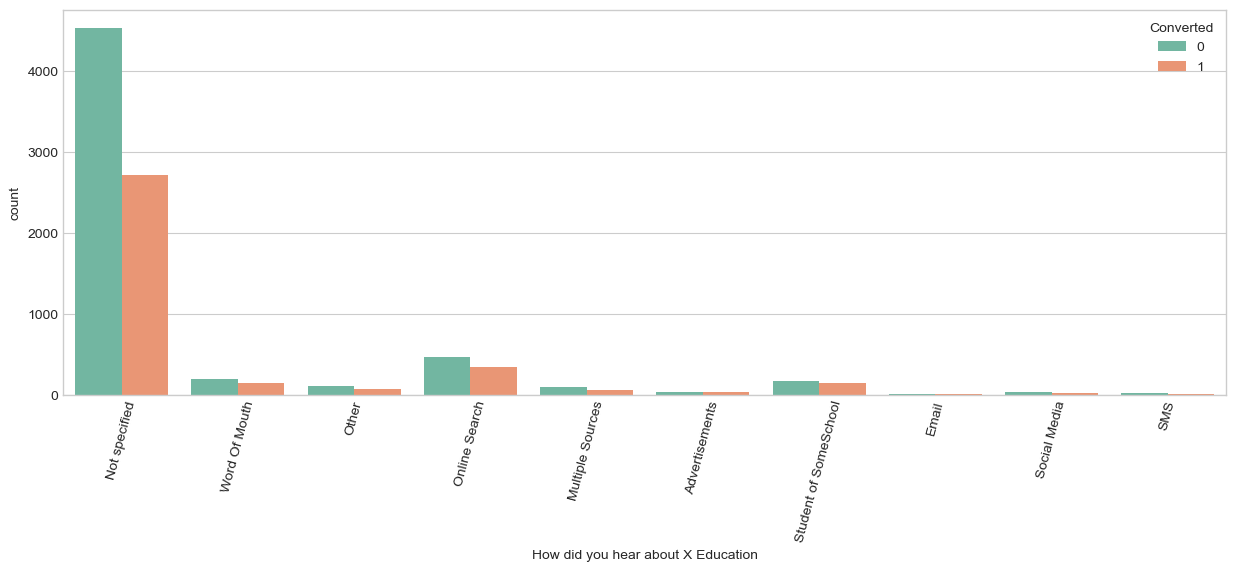

In [41]:
#PLotting the spread of 'How did you hear about X Education'

plt.figure(figsize=(15,5))
plt.style.use('seaborn-whitegrid')
s1 = sns.countplot(data=lead_scoring,x='How did you hear about X Education',hue = 'Converted', palette="Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation = 75)
plt.show()

In [42]:
lead_scoring = lead_scoring.drop(['How did you hear about X Education'], axis=1)

In [43]:
#Analyzing Lead Source
lead_scoring['Lead Source'].value_counts(dropna=False).head(10)

Google              2868
Direct Traffic      2543
Olark Chat          1755
Organic Search      1154
Reference            534
Welingak Website     142
Referral Sites       125
Facebook              55
NaN                   36
bing                   6
Name: Lead Source, dtype: int64

In [44]:
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace(np.nan, 'Others')

In [45]:
#there is another tag with G in lowercase for Google. We can replace it with Google

lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace('google', 'Google')

#we can also club social media and Facebook as they represent a common source
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace('Facebook', 'Social Media')

In [46]:
#clubbing together low occurrence values as "Others"
lead_scoring['Lead Source'] = lead_scoring['Lead Source'].replace(['bing', 'Click2call', 'Press_Release', 'youtubechannel', 'welearnblog_Home', 'WeLearn', 'blog', 'Pay per Click Ads' , 'Live Chat', 'Referral Sites' , 'testone', 'NC_EDM'], 'Others')

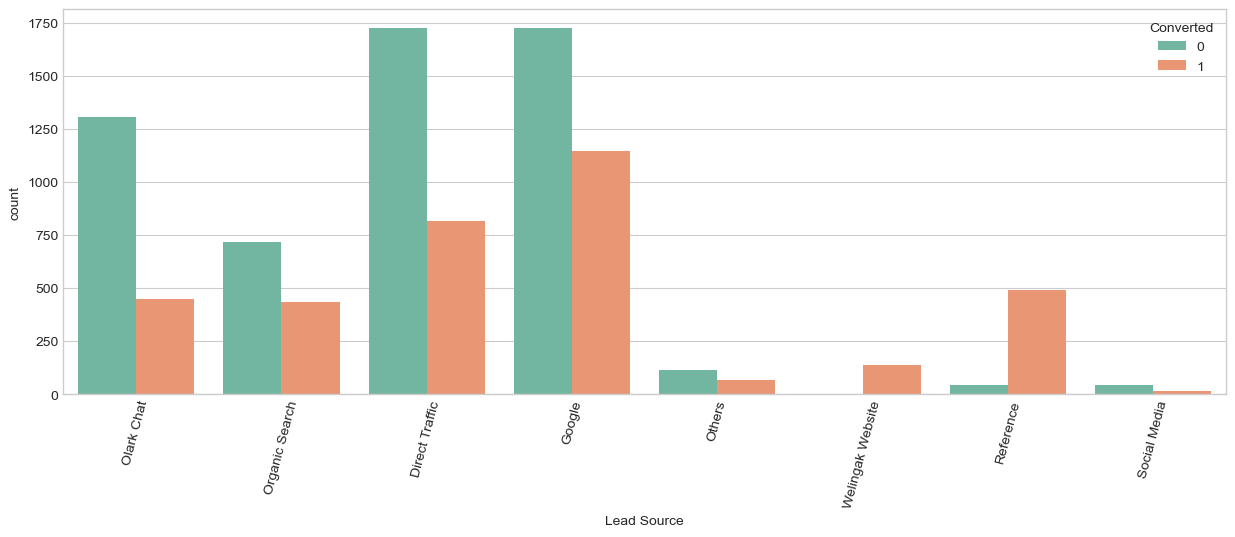

In [47]:
#PLotting 'Lead Source'

plt.figure(figsize=(15,5))
s1 = sns.countplot(data=lead_scoring, x='Lead Source', hue='Converted', palette="Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()


In [49]:
#Analyzing 'Country' column
lead_scoring['Country'].value_counts(dropna=False).head()

India                   6492
NaN                     2461
United States             69
United Arab Emirates      53
Singapore                 24
Name: Country, dtype: int64

In [50]:
#Imputation
lead_scoring['Country'] = lead_scoring['Country'].replace(np.nan, 'India')

In [51]:
lead_scoring['Country'] = lead_scoring['Country'].replace(['United States', 'United Arab Emirates', 'Singapore', 'Qatar', 'Saudi Arabia', 'Australia', 'United Kingdom', 'France', 'Oman', 'Bahrain', 'Canada', 'Germany', 'Russia', 'Belgium', 'Sri Lanka', 'China', 'Netherlands', 'Sweden', 'Kenya', 'Italy', 'Tanzania', 'Malaysia', 'Liberia', 'Switzerland', 'Denmark', 'Philippines' , 'Bangladesh', 'Indonesia', 'Uganda', 'Asia/Pacific Region', 'Ghana', 'Kuwait', 'Nigeria', 'South Africa', 'Vietnam', 'Nigeria', 'Hong Kong', 'unknown'], 'Non-India')

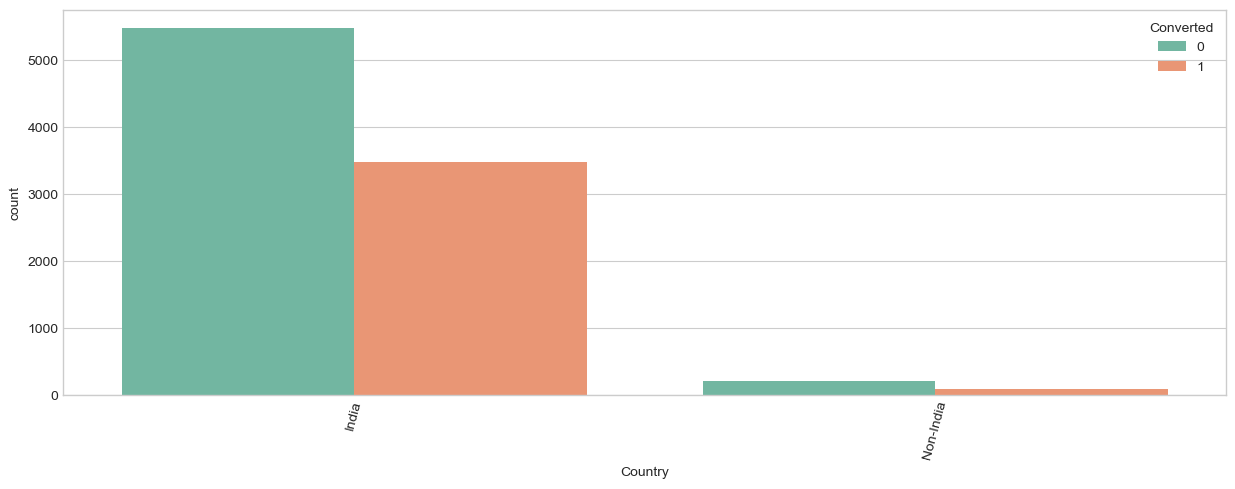

In [52]:
#PLOT to analyse the spread of Country
# Ensure 'Converted' is categorical
lead_scoring['Converted'] = lead_scoring['Converted'].astype('category')

# Plot
plt.figure(figsize=(15,5))
sns.countplot(data=lead_scoring, x='Country', hue='Converted', palette="Set2")
plt.xticks(rotation=75)
plt.show()


In [53]:
# creating a new list named 'drop_cols' containing all columns that we further need to drop

drop_cols = ['Country']

In [54]:
#Mappping values for Binary variable

lead_scoring['Country'] = lead_scoring['Country'].replace('India', 'Yes')
lead_scoring['Country'] = lead_scoring['Country'].replace('Cities (Non-India)', 'No')

In [55]:
#analyzing 'City' column
lead_scoring['City'].value_counts(dropna=False).head(7)

NaN                            3669
Mumbai                         3222
Thane & Outskirts               752
Other Cities                    686
Other Cities of Maharashtra     457
Other Metro Cities              380
Tier II Cities                   74
Name: City, dtype: int64

In [56]:
#Imputation
lead_scoring['City'] = lead_scoring['City'].replace(np.nan, 'Mumbai')

In [57]:
lead_scoring['City'] = lead_scoring['City'].replace(['Other Cities', 'Other Metro Cities','Other Cities of Maharashtra', 'Thane & Outskirts','Tier II Cities'],  'Cities (excluding Mumbai)')

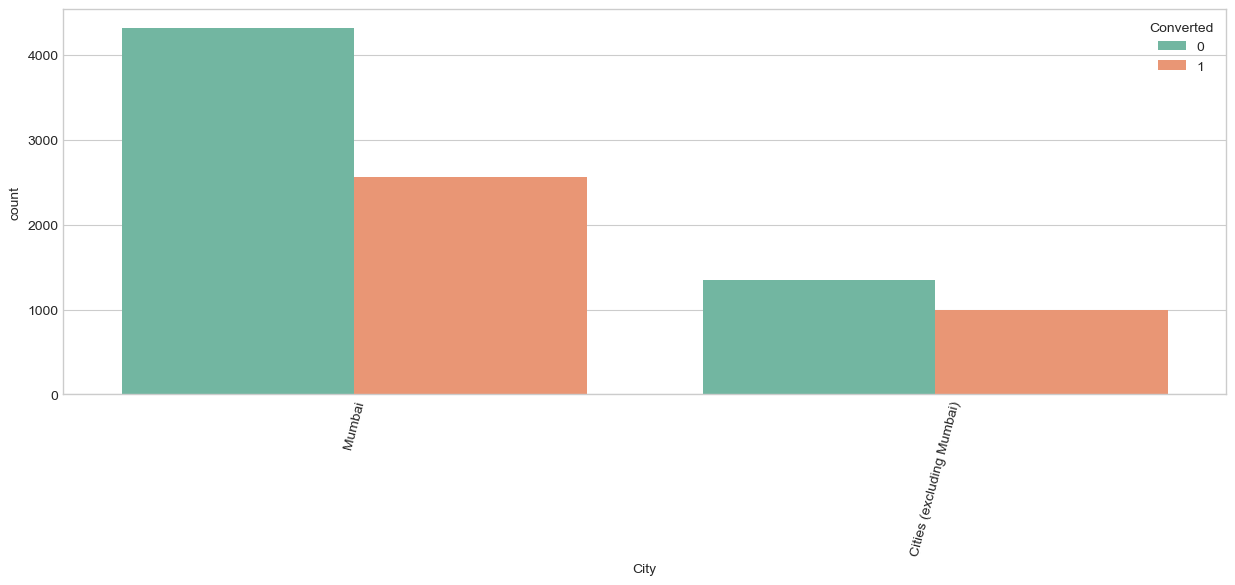

In [59]:
#PLOT to analyse the spread of City

# Plot
plt.figure(figsize=(15,5))
sns.countplot(data=lead_scoring, x='City', hue='Converted', palette="Set2")
plt.xticks(rotation=75)
plt.show()

In [60]:
#Mappping values for Binary variable

lead_scoring['City'] = lead_scoring['City'].replace('Mumbai', 'Yes')
lead_scoring['City'] = lead_scoring['City'].replace('Cities (excluding Mumbai)', 'No')

In [61]:
#analyzing 'Specialization' column
lead_scoring['Specialization'].value_counts(dropna=False).head()

NaN                          3380
Finance Management            976
Human Resource Management     848
Marketing Management          838
Operations Management         503
Name: Specialization, dtype: int64

In [62]:
#replacing null values with "Not specified"
lead_scoring['Specialization']= lead_scoring['Specialization'].replace(np.nan, 'Not specified')

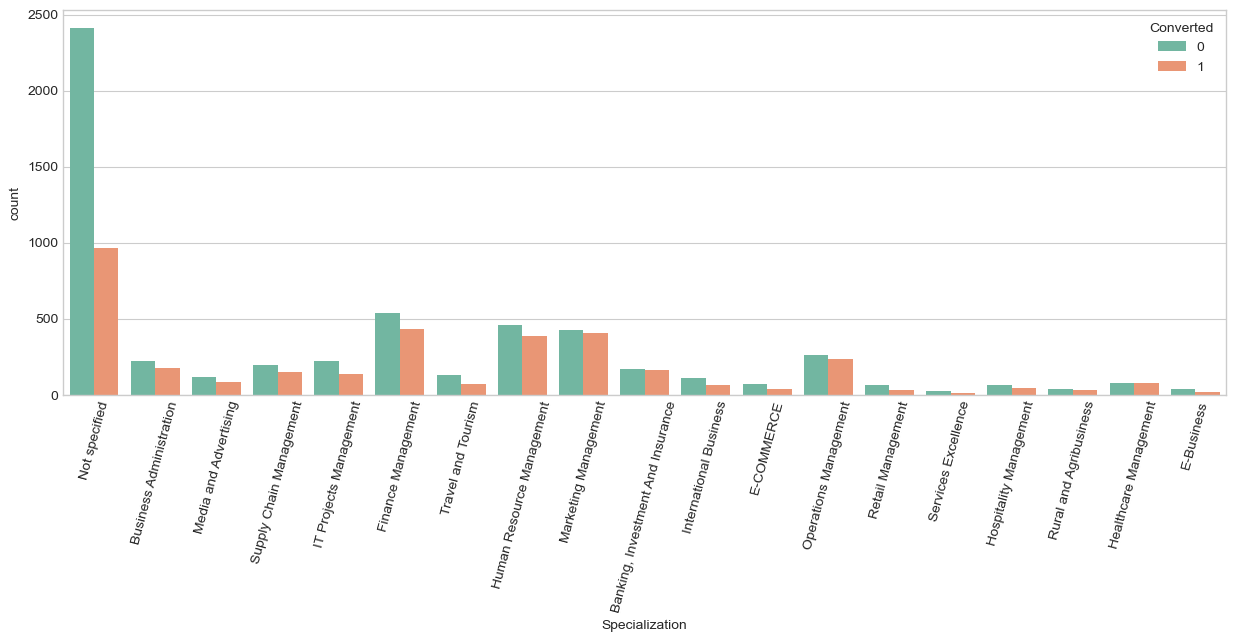

In [63]:
#PLOT to analyse the spread of Specialization
# Plot
plt.figure(figsize=(15,5))
sns.countplot(data=lead_scoring, x='Specialization', hue='Converted', palette="Set2")
plt.xticks(rotation=75)
plt.show()

In [64]:
lead_scoring['Specialization'] = lead_scoring['Specialization'].replace(['IT Projects Management', 'Human Resource Management', 'Supply Chain Management', 'Finance Management', 'Marketing Management', 'Hospitality Management', 'Healthcare Management', 'Retail Management', 'Operations Management'], 'Management_specializations')

lead_scoring['Specialization'] = lead_scoring['Specialization'].replace(['Services Excellence', 'E-COMMERCE', 'Travel and Tourism', 'Banking, Investment And Insurance', 'Media and Advertising', 'Investment And Insurance'], 'Industrial Specializations')

lead_scoring['Specialization'] = lead_scoring['Specialization'].replace(['Business Administration', 'Rural and Agribusiness', 'E-Business', 'International Business'], 'Business Specializations')

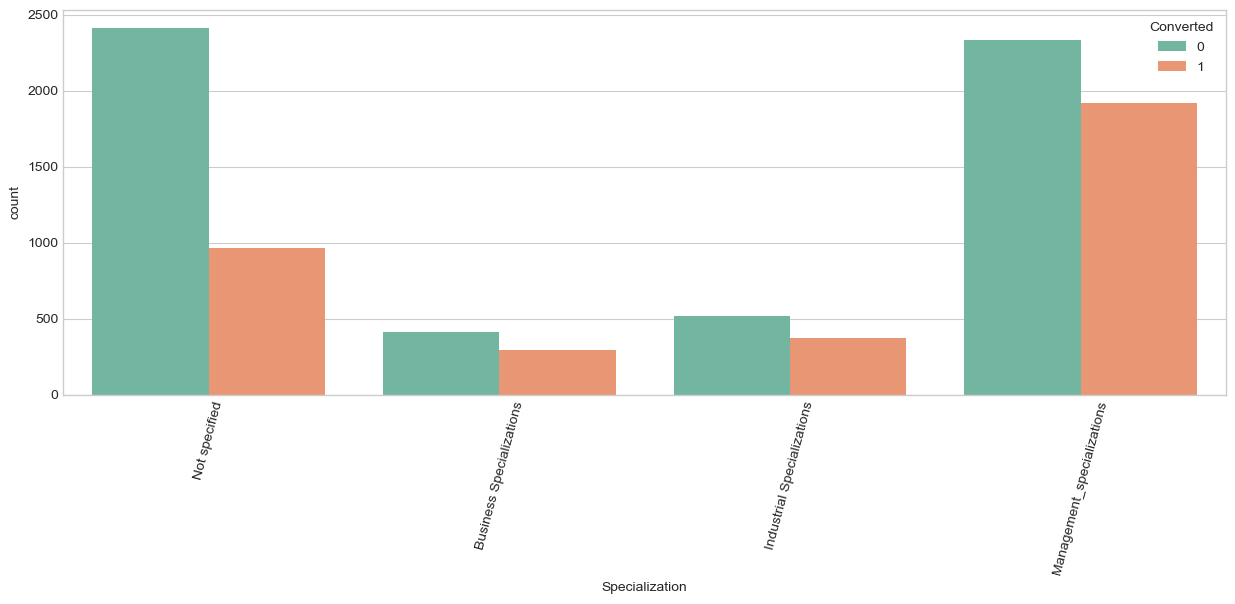

In [65]:
#plotting the new Specializations colummn
# Create the plot
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='Specialization', hue='Converted', data=lead_scoring, palette="Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [66]:
drop_cols.append('Specialization')

In [67]:
#analyzing 'What is your current occupation' column
lead_scoring['What is your current occupation'].value_counts(dropna=False).head()

Unemployed              5600
NaN                     2690
Working Professional     706
Student                  210
Other                     16
Name: What is your current occupation, dtype: int64

In [68]:
#replacing null values with "Not Specified"
lead_scoring['What is your current occupation']= lead_scoring['What is your current occupation'].replace(np.nan, 'Not Specified')

In [69]:
lead_scoring['What is your current occupation'] = lead_scoring['What is your current occupation'].replace(['Housewife', 'Student', 'Businessman', 'Other'], 'Students and Others')

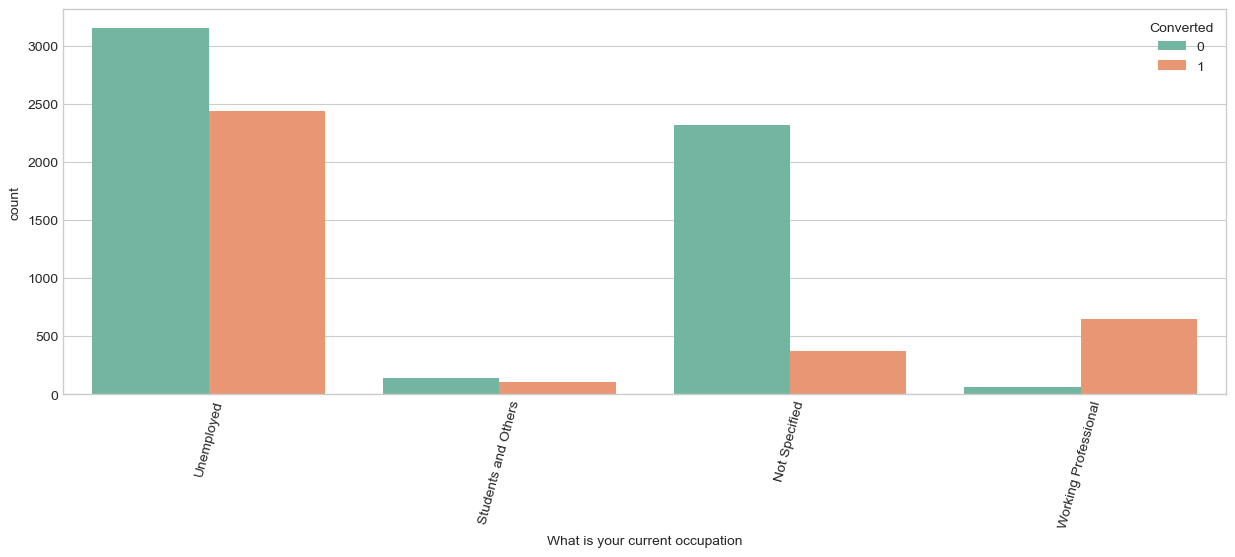

In [70]:
#plotting the new Occupation colummn
plt.figure(figsize=(15, 5))
s1 = sns.countplot(x='What is your current occupation', hue='Converted', data=lead_scoring, palette="Set2")
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [71]:
#analyzing 'What matters most to you in choosing a course' column
lead_scoring['What matters most to you in choosing a course'].value_counts(dropna=False).head()

Better Career Prospects      6528
NaN                          2709
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [73]:
lead_scoring['What matters most to you in choosing a course'] = lead_scoring['What matters most to you in choosing a course'].replace(np.nan, 'Better Career Prospects')

In [74]:
lead_scoring['What matters most to you in choosing a course'] =  lead_scoring['What matters most to you in choosing a course'].replace(['Flexibility & Convenience', 'Other'], 'Better Career Prospects')

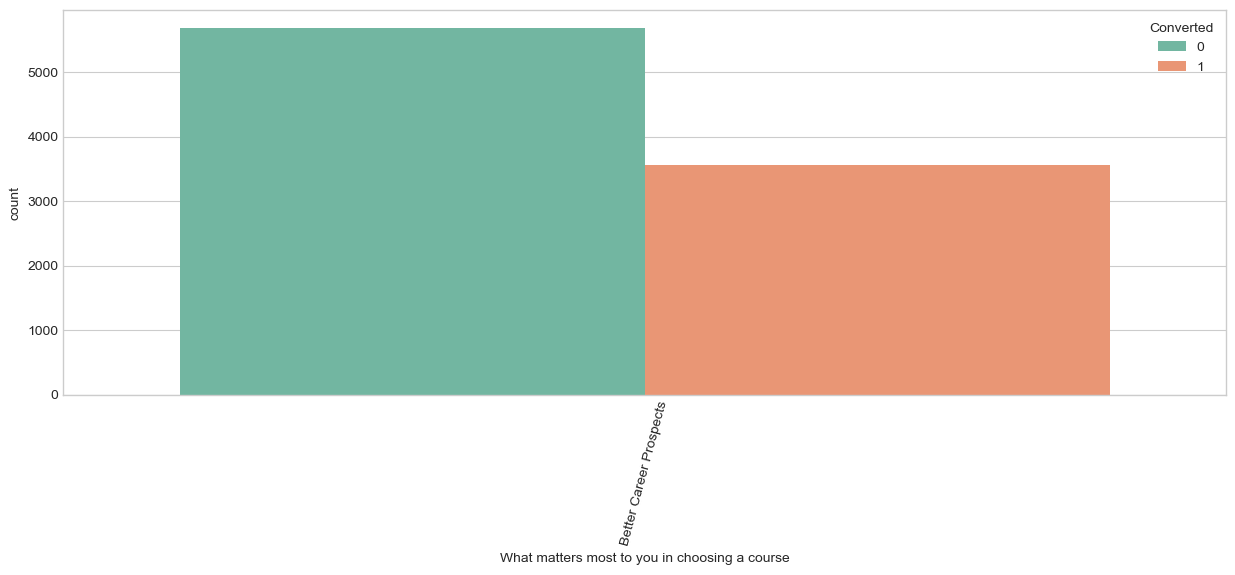

In [75]:
#plotting the 'What matters most to you in choosing a course' colummn
plt.figure(figsize=(15,5))
s1 = sns.countplot(
    x='What matters most to you in choosing a course',  # x-axis
    hue='Converted',  # hue
    data=lead_scoring,  # data
    palette="Set2"
)

s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [76]:
drop_cols.append('What matters most to you in choosing a course')

In [77]:
#analyzing 'Tags' column

lead_scoring['Tags'].value_counts(dropna=False).head()

NaN                                    3353
Will revert after reading the email    2072
Ringing                                1203
Interested in other courses             513
Already a student                       465
Name: Tags, dtype: int64

In [78]:
lead_scoring['Tags'] = lead_scoring['Tags'].replace(np.nan, 'Not specified')

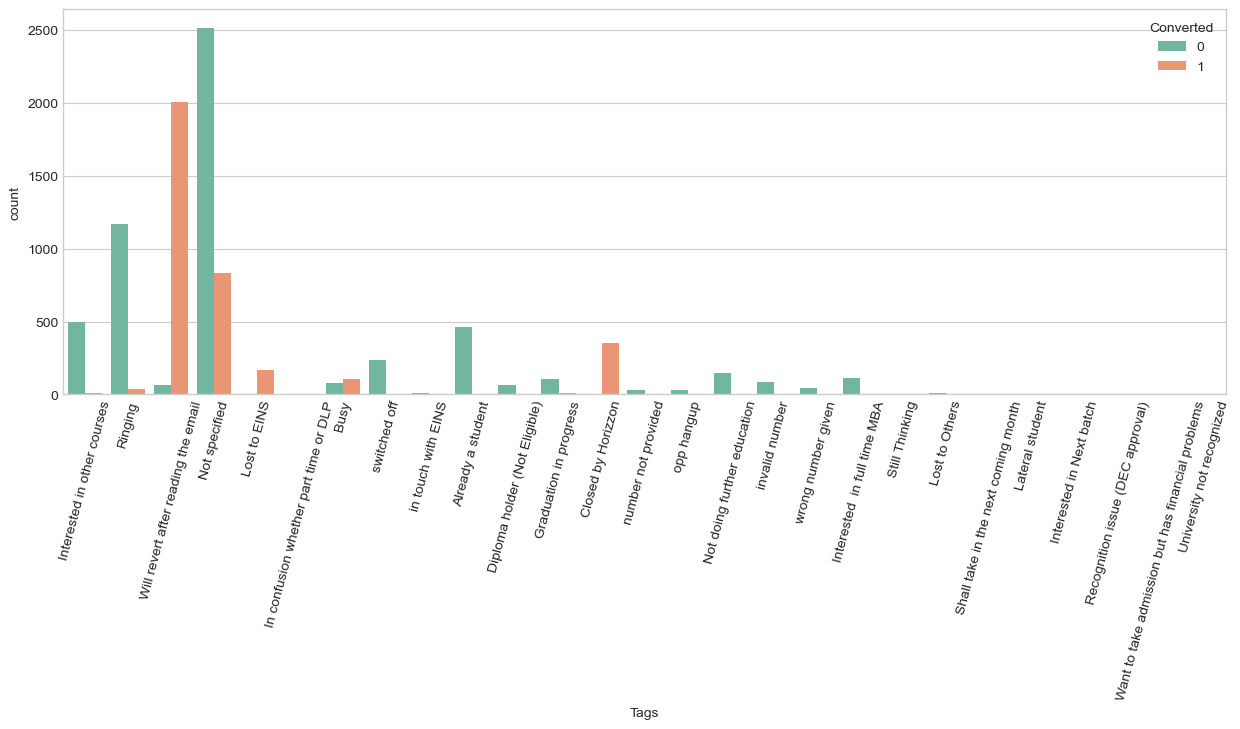

In [79]:
#plotting the 'Tags' colummn
plt.figure(figsize=(15,5))
s1 = sns.countplot(
    x='Tags',  # x-axis
    hue='Converted',  # hue
    data=lead_scoring,  # data
    palette="Set2"
)

# Rotate x-tick labels for better readability
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [80]:
#Replacing all lower frequency tags as 'Other tags'

lead_scoring['Tags'] = lead_scoring['Tags'].replace(['In confusion whether part time or DLP',
                                       'Lost to EINS', 'in touch with EINS',
                                       'Diploma holder (Not Eligible)', 'Approached upfront',
                                       'Graduation in progress', 'number not provided', 
                                       'opp hangup', 'Still Thinking', 'Lost to Others', 
                                       'Shall take it in the next coming month', 
                                       'Interested in Next batch',
                                       'Recognition issue (DEC approval)', 
                                       'Want to take admission but has financial problems', 
                                       'University not recognized', 'switched off',
                                       'Already a student', 'Not doing further education', 
                                       'invalid number', 'wrong number given', 
                                       'Interested in full time MBA', 
                                       'Shall take in the next coming month', 
                                       'Lateral student'], 'Other_Tags')

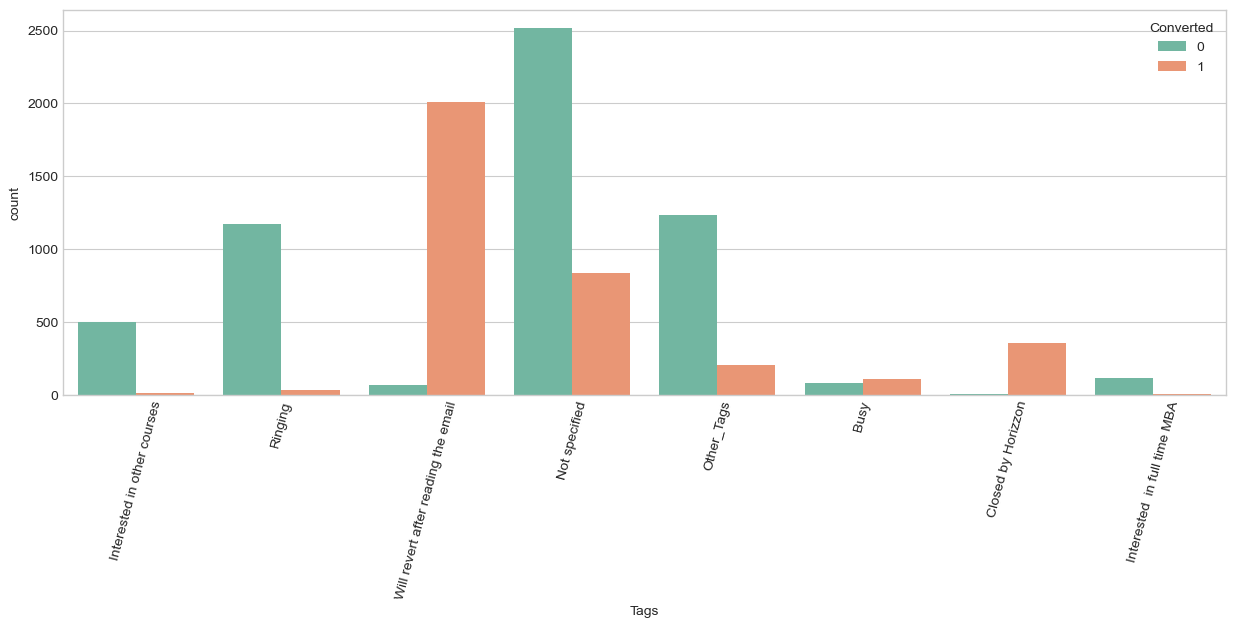

In [81]:
#plotting the new 'Tags' colummn
plt.figure(figsize=(15,5))
s1 = sns.countplot(
    x='Tags',  # x-axis
    hue='Converted',  # hue based on the 'Converted' column
    data=lead_scoring,  # Using lead_scoring as the DataFrame
    palette="Set2"
)

# Rotate x-tick labels for better readability
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [82]:
#analyzing 'Last Activity' column

lead_scoring['Last Activity'].value_counts(dropna=False).head()

Email Opened               3437
SMS Sent                   2745
Olark Chat Conversation     973
Page Visited on Website     640
Converted to Lead           428
Name: Last Activity, dtype: int64

In [83]:
lead_scoring['Last Activity'] = lead_scoring['Last Activity'].replace(np.nan, 'Others')

In [84]:
lead_scoring['Last Activity'] = lead_scoring['Last Activity'].replace(['Unreachable', 'Unsubscribed', 'Had a Phone Conversation', 'Approached upfront', 'View in browser link Clicked', 'Email Marked Spam', 'Email Received', 
                                                         'Resubscribed to emails', 'Visited Booth in Tradeshow'], 'Others')

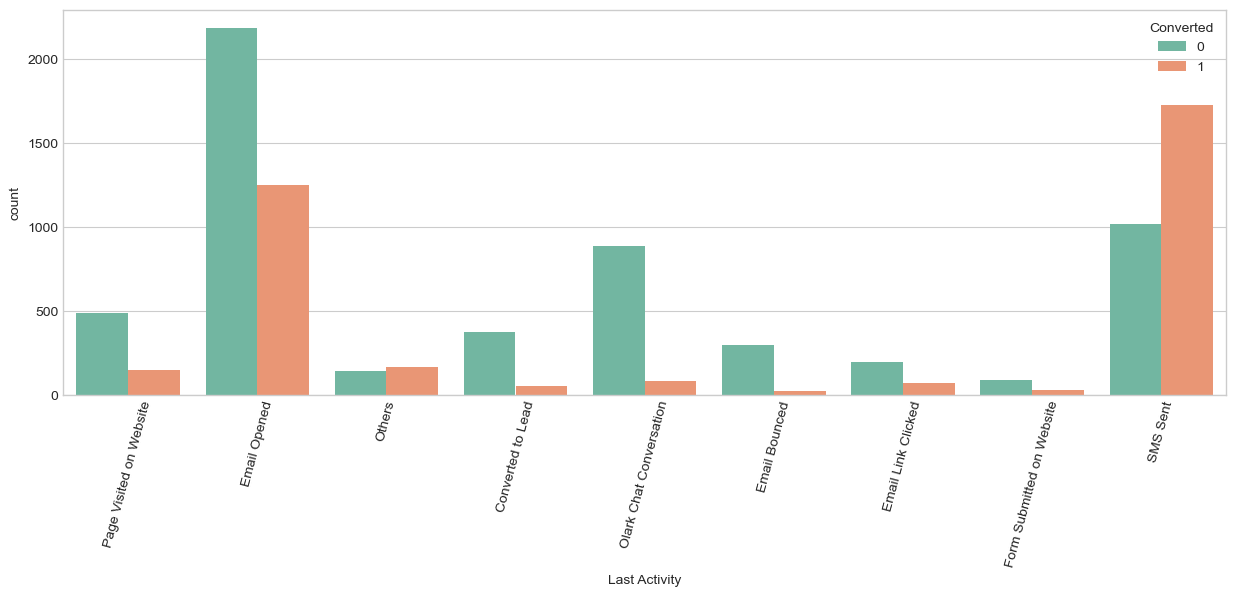

In [85]:
#plotting the new 'Last Activity' colummn
plt.figure(figsize=(15,5))
s1 = sns.countplot(
    x='Last Activity',  # Use 'Last Activity' for the x-axis
    hue='Converted',  # Use the 'Converted' column for hue
    data=lead_scoring,  # Pass the correct DataFrame, lead_scoring
    palette="Set2"  # Choose a rainbow color palette
)

# Rotate x-tick labels for better readability
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [86]:
#analyzing 'Last Notable Activity' column

lead_scoring['Last Notable Activity'].value_counts(dropna=False).head()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Name: Last Notable Activity, dtype: int64

In [87]:
#analyzing 'What is your current occupation' column
lead_scoring['Last Notable Activity'].value_counts(dropna=False).head()

Modified                   3407
Email Opened               2827
SMS Sent                   2172
Page Visited on Website     318
Olark Chat Conversation     183
Name: Last Notable Activity, dtype: int64

In [88]:
lead_scoring['Last Notable Activity'] = lead_scoring['Last Notable Activity'].replace(['Email Marked Spam', 'Had a Phone Conversation', 'Unreachable', 'Resubscribed to emails', 'Approached upfront', 'Form Submitted on Website', 'Unsubscribed', 'Email Bounced', 'View in browser lit', 'View in browser link Clicked', 'Email Received'], 'Other activities')

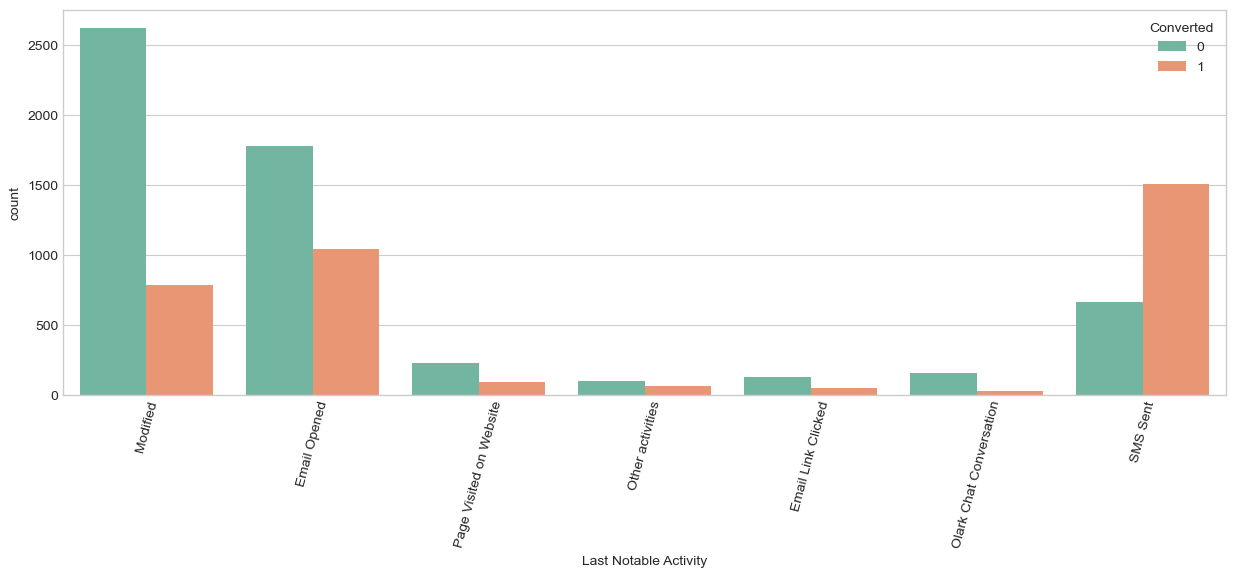

In [89]:
#plotting the 'Last Notable Activity' colummn
plt.figure(figsize=(15,5))
s1 = sns.countplot(
    x='Last Notable Activity',  # Use 'Last Notable Activity' for the x-axis
    hue='Converted',  # Use the 'Converted' column for hue
    data=lead_scoring,  # Use the correct DataFrame 'lead_scoring'
    palette="Set2"  # Choose a Set2 color palette
)

# Rotate x-tick labels for better readability
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [90]:
#analyzing 'Lead Origin' column

lead_scoring['Lead Origin'].value_counts(dropna=False).head()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [91]:
lead_scoring['Lead Origin'] =  lead_scoring['Lead Origin'].replace(['Quick Add Form', 'Lead Import'], 'Others')

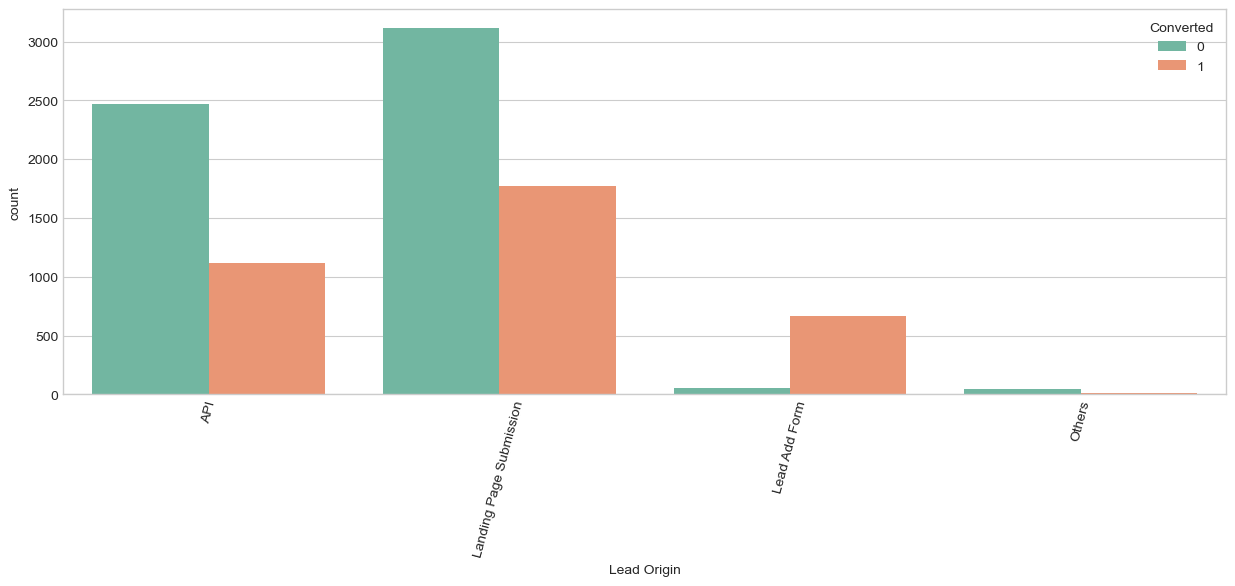

In [92]:
#plotting the new 'Lead Origin' colummn
plt.figure(figsize=(15,5))
s1 = sns.countplot(
    x='Lead Origin',  # x-axis is the 'Lead Origin' column
    hue='Converted',  # hue based on the 'Converted' column
    data=lead_scoring,  # Pass the lead_scoring DataFrame
    palette="Set2"  # Choose a rainbow color palette
)

# Rotate x-tick labels for better readability
s1.set_xticklabels(s1.get_xticklabels(), rotation=75)
plt.show()

In [93]:
#We will add them to the drop_cols list

drop_cols.extend(['Tags' , 'Last Activity', 'Last Notable Activity'])

## Columns : 'Lead Quality', 'Lead Profile' have already been dropped due to missing values and skewness respectively

In [95]:
#analyzing columns : 'Do Not Call' and 'Do not Email' columns
lead_scoring['Do Not Email'].value_counts(dropna=False).head()

No     8506
Yes     734
Name: Do Not Email, dtype: int64

In [96]:
lead_scoring['Do Not Call'].value_counts(dropna=False).head()

No     9238
Yes       2
Name: Do Not Call, dtype: int64

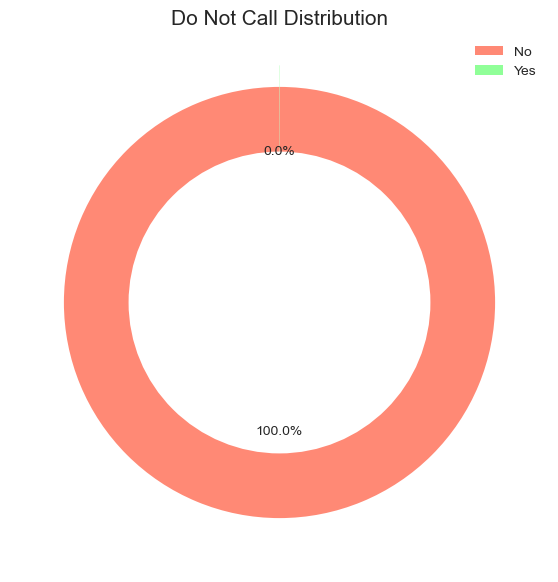

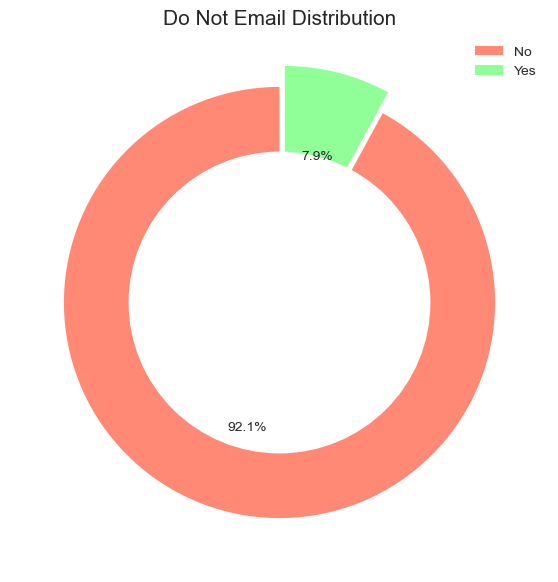

In [99]:
# Check the distribution of both the above variables using Pie Plots


plt.figure(figsize=(7,7))
ax1 = plt.pie(lead_scoring['Do Not Call'].value_counts(normalize = True, dropna=False) * 100, autopct='%1.1f%%', colors = ['#ff8975', '#90ff98'], startangle=90, explode = (0, 0.1))
plt.legend(labels = ["No", "Yes"], loc="upper right")
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.title('Do Not Call Distribution', fontsize = 15)
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()

plt.figure(figsize=(7,7))
ax2 = plt.pie(lead_scoring['Do Not Email'].value_counts(normalize = True, dropna=False) * 100, autopct='%1.1f%%', colors = ['#ff8975', '#90ff98'], startangle=90, explode = (0, 0.1))
plt.legend(labels = ["No", "Yes"], loc="upper right")
plt.title('Do Not Email Distribution', fontsize = 15)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()

In [100]:
drop_cols.append('Do Not Call')

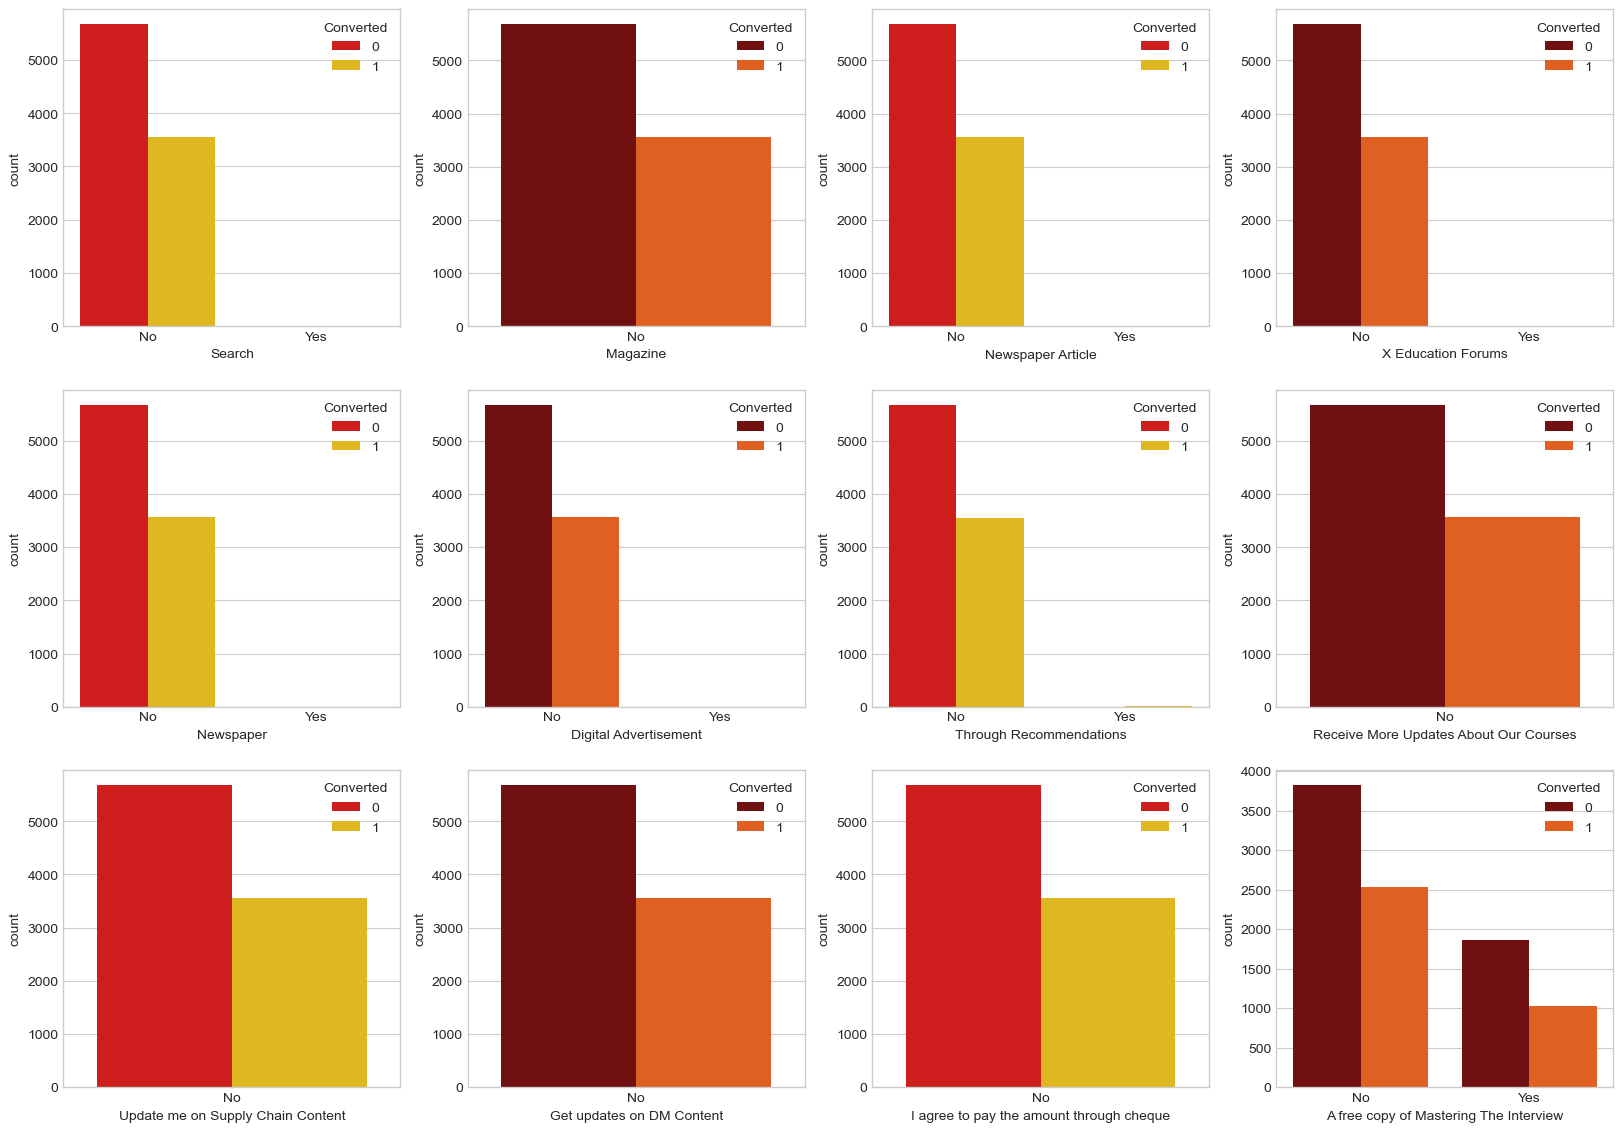

In [101]:
fig, axes = plt.subplots(3,4, figsize = (20,14))


sns.countplot(x= "Search", hue = 'Converted', data = lead_scoring, ax=axes[0,0], palette = 'hot')

sns.countplot(x= "Magazine", hue = 'Converted', data = lead_scoring, ax=axes[0,1], palette ='gist_heat')

sns.countplot(x= "Newspaper Article", hue = 'Converted', data = lead_scoring, ax=axes[0,2], palette = 'hot')

sns.countplot(x= "X Education Forums", hue = 'Converted', data = lead_scoring, ax=axes[0,3], palette = 'gist_heat')

sns.countplot(x= "Newspaper", hue = 'Converted', data = lead_scoring, ax=axes[1,0], palette = 'hot')

sns.countplot(x= "Digital Advertisement", hue = 'Converted', data = lead_scoring, ax=axes[1,1], palette= 'gist_heat')

sns.countplot(x= "Through Recommendations", hue = 'Converted', data = lead_scoring, ax=axes[1,2], palette = 'hot')

sns.countplot(x= "Receive More Updates About Our Courses", hue = 'Converted', data = lead_scoring, ax=axes[1,3], palette = 'gist_heat')

sns.countplot(x= "Update me on Supply Chain Content", hue = 'Converted', data = lead_scoring, ax=axes[2,0], palette = 'hot')

sns.countplot(x= "Get updates on DM Content", hue = 'Converted', data = lead_scoring, ax=axes[2,1], palette = 'gist_heat')

sns.countplot(x= "I agree to pay the amount through cheque", hue = 'Converted', data = lead_scoring, ax=axes[2,2], palette = 'hot')

sns.countplot(x= "A free copy of Mastering The Interview", hue = 'Converted', data = lead_scoring, ax=axes[2,3], palette = 'gist_heat')


plt.show()

In [102]:
#ADDING ALL THE ABOVE SKEWED COLUMNS IN THE LIST OF COLUMNS THAT NEED TO BE DROPPED

drop_cols.extend(['Search' , 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 'Update me on Supply Chain Content', 'Get updates on DM Content', 'City' , 'I agree to pay the amount through cheque'])

In [103]:
lead_scoring = lead_scoring.drop(drop_cols, axis=1)


In [104]:
lead_scoring.shape

(9240, 9)

In [105]:
lead_scoring.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation',
       'A free copy of Mastering The Interview'],
      dtype='object')

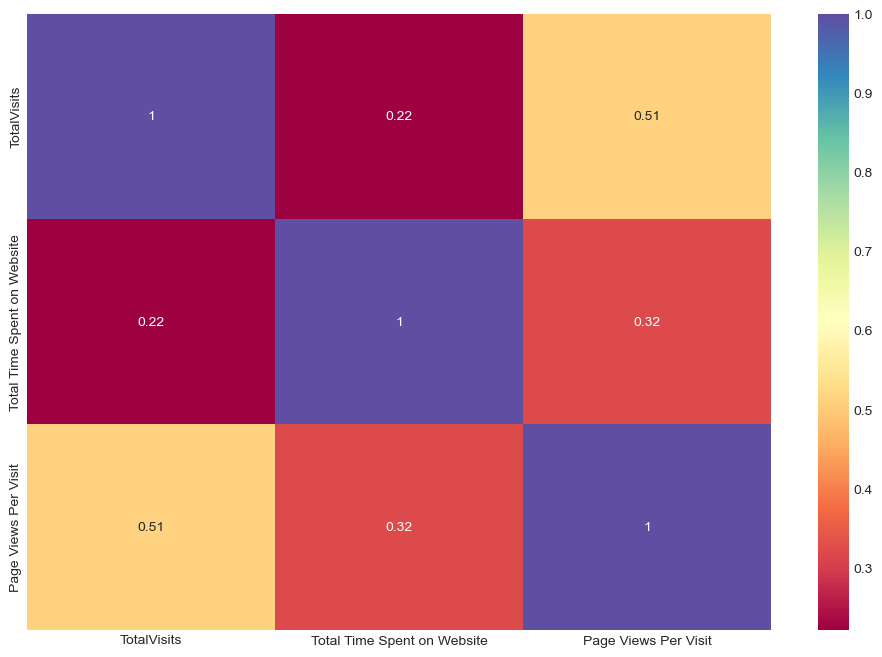

In [106]:
#the correlation between all numerical columns

numeric_cols = lead_scoring.select_dtypes(include=['number']).columns
corr_matrix = lead_scoring[numeric_cols].corr()
# Plot the heatmap
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, cmap='Spectral', annot=True)
plt.show()

In [107]:
lead_scoring['TotalVisits'].value_counts(dropna=False).head()

0.0    2189
2.0    1680
3.0    1306
4.0    1120
5.0     783
Name: TotalVisits, dtype: int64

In [108]:
lead_scoring['TotalVisits'].fillna(lead_scoring['TotalVisits'].median(), inplace=True)

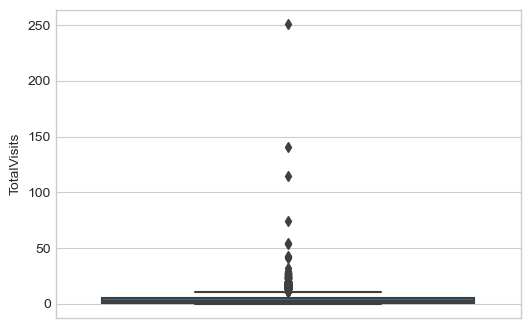

In [109]:
plt.figure(figsize=(6,4))
sns.boxplot(y=lead_scoring['TotalVisits'])
plt.show()

In [110]:
#TotalVisits column

lead_scoring['TotalVisits'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9240.000000
mean        3.438636
std         4.819024
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

C:\Users\dhirs\AppData\Local\Temp\ipykernel_12092\2316369057.py:10: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


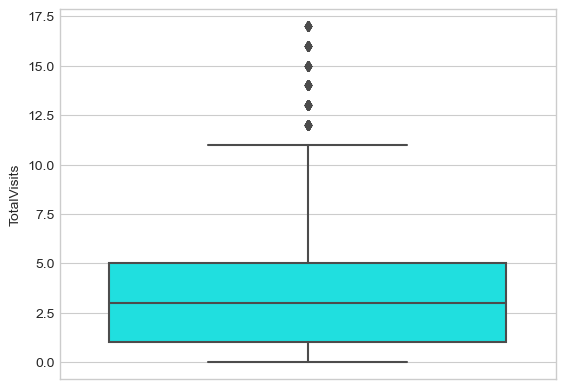

In [112]:
## We can remove top and bottom 0.01, i.e 1% of the outlier values

Q3 = lead_scoring['TotalVisits'].quantile(0.99)
lead_scoring = lead_scoring[(lead_scoring.TotalVisits<=Q3)]
               
Q1 = lead_scoring['TotalVisits'].quantile(0.01)
lead_scoring = lead_scoring[(lead_scoring.TotalVisits>=Q1)]
               
sns.boxplot(y=lead_scoring['TotalVisits'], color='cyan')
plt.style.use('seaborn-whitegrid')
plt.show()

In [113]:
lead_scoring['Total Time Spent on Website'].value_counts(dropna=False).head()

0      2193
60       19
127      18
75       18
74       17
Name: Total Time Spent on Website, dtype: int64

In [114]:
#Total Time Spent on Website column

lead_scoring['Total Time Spent on Website'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9157.000000
mean      486.189036
std       547.695908
min         0.000000
5%          0.000000
25%        10.000000
50%       247.000000
75%       933.000000
90%      1379.000000
95%      1559.400000
99%      1839.440000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

C:\Users\dhirs\AppData\Local\Temp\ipykernel_12092\1410626710.py:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


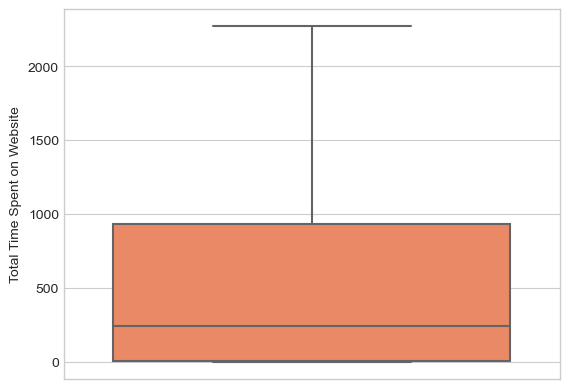

In [115]:
#Plot the spread

sns.boxplot(y=lead_scoring['Total Time Spent on Website'], color='coral')
plt.style.use('seaborn-whitegrid')
plt.show()

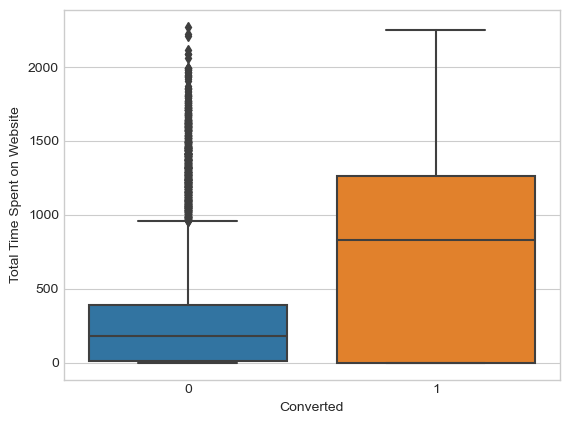

In [116]:
# Checking the spread of 'Total Time Spent on Website' vs Converted leads

sns.boxplot(x= lead_scoring.Converted, y=lead_scoring['Total Time Spent on Website'])
plt.show()

In [117]:
lead_scoring['Page Views Per Visit'].value_counts(dropna=False).head()

0.0    2189
2.0    1792
3.0    1193
4.0     893
1.0     651
Name: Page Views Per Visit, dtype: int64

In [118]:
lead_scoring['Page Views Per Visit'].fillna(lead_scoring['Page Views Per Visit'].median(), inplace=True)

In [119]:
lead_scoring['Page Views Per Visit'] = lead_scoring['Page Views Per Visit'].astype('int')

In [120]:
#Page Views Per Visit column

lead_scoring['Page Views Per Visit'].describe(percentiles=[0.05, 0.25, 0.5, 0.75, 0.90, 0.95, 0.99])

count    9157.000000
mean        2.266790
std         2.053171
min         0.000000
5%          0.000000
25%         1.000000
50%         2.000000
75%         3.000000
90%         5.000000
95%         6.000000
99%         9.000000
max        16.000000
Name: Page Views Per Visit, dtype: float64

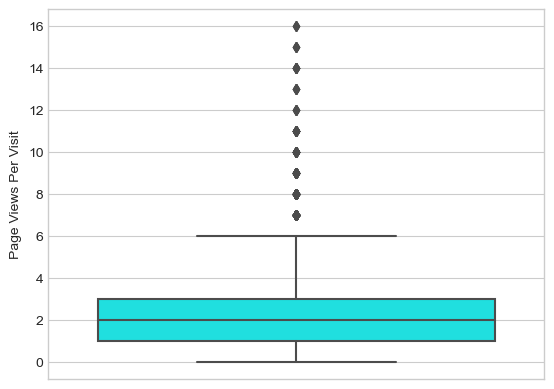

In [121]:
#Clear presence of outliers here

sns.boxplot(y=lead_scoring['Page Views Per Visit'], color='cyan')

plt.show()

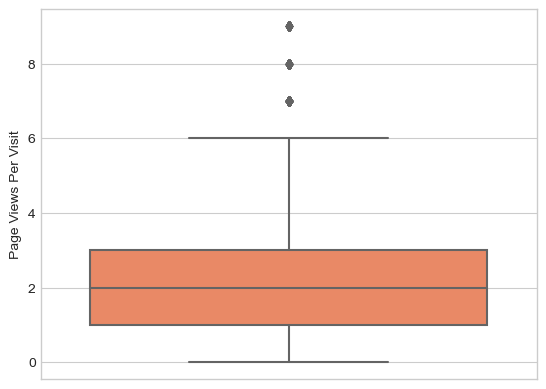

In [122]:
## We can remove top and bottom 0.01, i.e 1% of the outlier values

Q3 = lead_scoring['Page Views Per Visit'].quantile(0.99)
lead_scoring = lead_scoring[(lead_scoring.TotalVisits<=Q3)]
               
Q1 = lead_scoring['Page Views Per Visit'].quantile(0.01)
lead_scoring = lead_scoring[(lead_scoring.TotalVisits>=Q1)]
               
sns.boxplot(y=lead_scoring['Page Views Per Visit'], color='coral')
plt.show()

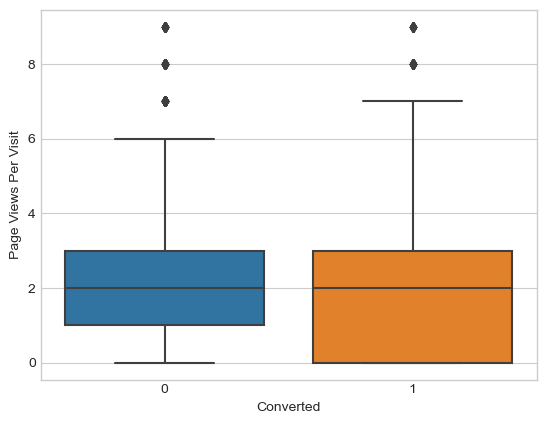

In [123]:
# Checking the spread of 'Total Time Spent on Website' vs Converted leads

sns.boxplot(x=lead_scoring.Converted, y=lead_scoring['Page Views Per Visit'])
plt.show()

C:\Users\dhirs\AppData\Local\Temp\ipykernel_12092\1036691653.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lead_scoring[col])
C:\Users\dhirs\AppData\Local\Temp\ipykernel_12092\1036691653.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(lead_scoring[col])
C:\Users\dhirs\AppData\Local\Tem

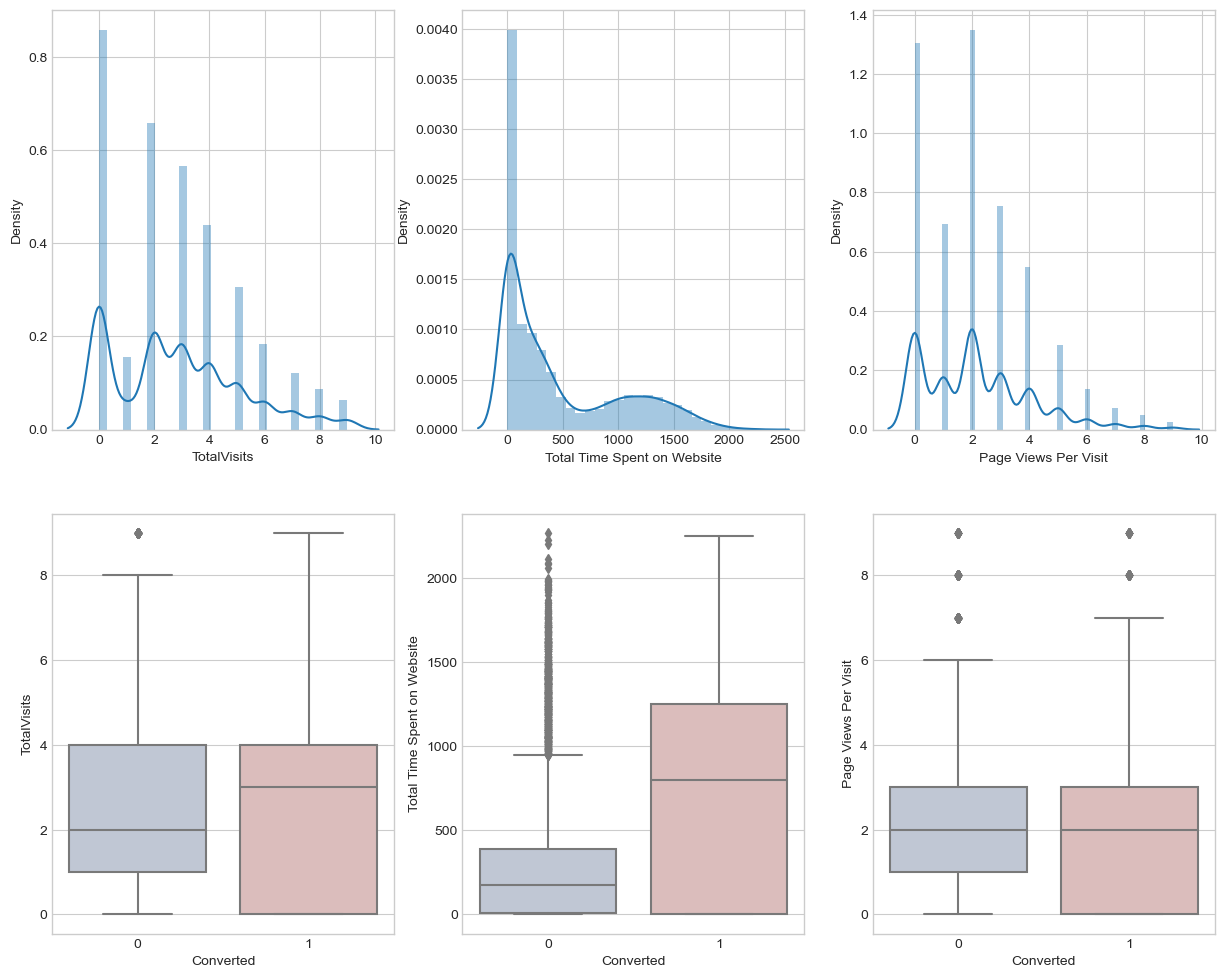

In [124]:
num_col = ['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']
plt.figure(figsize=(15,12))

i=1
for col in num_col :
    plt.subplot(2,3,i)
    sns.distplot(lead_scoring[col])
    plt.subplot(2, 3, 3+i)
    sns.boxplot(y=lead_scoring[col], x=lead_scoring['Converted'],  palette = 'vlag')
    i+= 1

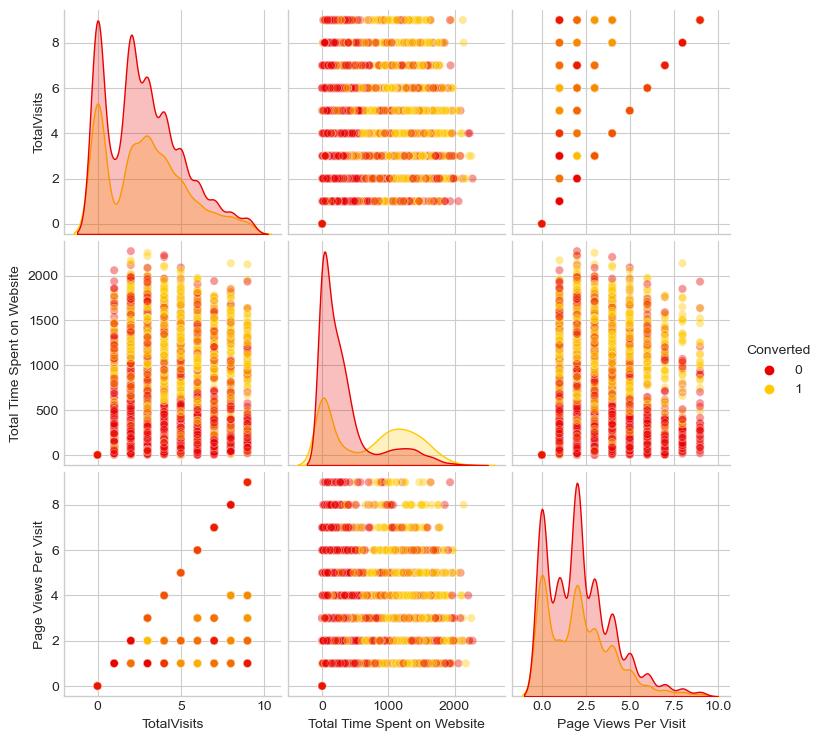

In [125]:
num_cols = pd.Series(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit', 'Converted'])
sns.pairplot(lead_scoring[num_cols] , hue = 'Converted', kind='scatter', plot_kws= {'alpha': 0.4}, palette = 'hot')

In [126]:
## let us finally check the null percentage in remaining columns

round(100*(lead_scoring.isnull().sum()/len(lead_scoring.index)), 2)

Lead Origin                               0.0
Lead Source                               0.0
Do Not Email                              0.0
Converted                                 0.0
TotalVisits                               0.0
Total Time Spent on Website               0.0
Page Views Per Visit                      0.0
What is your current occupation           0.0
A free copy of Mastering The Interview    0.0
dtype: float64

In [127]:
lead_scoring.shape

(8773, 9)

In [128]:
lead_scoring.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,What is your current occupation,A free copy of Mastering The Interview
0,API,Olark Chat,No,0,0.0,0,0,Unemployed,No
1,API,Organic Search,No,0,5.0,674,2,Unemployed,No
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2,Students and Others,Yes
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1,Unemployed,No
4,Landing Page Submission,Google,No,1,2.0,1428,1,Unemployed,No


In [129]:
# mapping binary valued columns to 0 and 1 

binary_cols = ['Do Not Email', 'A free copy of Mastering The Interview']

def mapping(b):
    return b.map({'Yes' : 1, 'No': 0})

lead_scoring[binary_cols] = lead_scoring[binary_cols].apply(mapping)

In [130]:
## Grouping up all categorical columns in a list

cat_cols = lead_scoring.select_dtypes(include=['object']).columns

In [131]:
dummy = pd.get_dummies(lead_scoring['Lead Origin'], prefix='Lead Origin')
dummy = dummy.drop('Lead Origin_Others', axis=1)

lead_scoring = pd.concat([lead_scoring, dummy], axis=1)

In [132]:
dummy = pd.get_dummies(lead_scoring['What is your current occupation'], prefix='What is your current occupation')
dummy = dummy.drop('What is your current occupation_Not Specified', axis=1)

lead_scoring = pd.concat([lead_scoring, dummy], axis=1)


In [133]:
dummy = pd.get_dummies(lead_scoring['Lead Source'], prefix ='Lead Source')
if 'Lead Source_Others' in dummy.columns:
    dummy = dummy.drop(['Lead Source_Others'], axis=1)


lead_scoring = pd.concat([lead_scoring,dummy],axis=1)

In [134]:
lead_scoring.drop(cat_cols,axis=1)

,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Students and Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website
0,0,0,0.0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0
1,0,0,5.0,674,2,0,1,0,0,0,1,0,0,0,0,1,0,0,0
2,0,1,2.0,1532,2,1,0,1,0,1,0,0,1,0,0,0,0,0,0
3,0,0,1.0,305,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0
4,0,1,2.0,1428,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,1,1,8.0,1845,2,0,0,1,0,0,1,0,1,0,0,0,0,0,0
9236,0,0,2.0,238,2,1,0,1,0,0,1,0,1,0,0,0,0,0,0
9237,1,0,2.0,199,2,1,0,1,0,0,1,0,1,0,0,0,0,0,0
9238,0,1,3.0,499,3,0,0,1,0,0,0,0,0,1,0,0,0,0,0


In [135]:
lead_scoring.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Students and Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website'],
      dtype='object')

In [136]:
# setting up our target variable as y

y = lead_scoring['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: category
Categories (2, int64): [0, 1]

In [137]:
x = lead_scoring.drop('Converted', axis = 1)

# Train Test Split

In [138]:
# perform splitting

x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.7, test_size=0.3, random_state=100)

In [139]:
x_train.shape

(6141, 21)

In [140]:
# check correlation between numeric columns
correlation=x_train.corr(method = 'pearson')
correlation.head()

C:\Users\dhirs\AppData\Local\Temp\ipykernel_12092\814123095.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation=x_train.corr(method = 'pearson')


,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Students and Others,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Lead Source_Direct Traffic,Lead Source_Google,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website
Do Not Email,1.000000,-0.019484,-0.059793,0.017446,0.054896,-0.076065,0.090037,-0.023343,-0.002961,-0.021852,-0.056575,0.103763,-0.063733,-0.045310,0.028831,-0.044935,-0.024921,0.000279
TotalVisits,-0.019484,1.000000,0.378197,0.781671,0.296463,-0.340405,0.502292,-0.291570,-0.024124,0.090876,-0.007822,0.147571,0.304997,-0.551285,0.288025,-0.240956,-0.052263,-0.136964
Total Time Spent on Website,-0.059793,0.378197,1.000000,0.349528,0.151578,-0.189323,0.270285,-0.145038,-0.002038,0.083967,0.097124,0.122315,0.243084,-0.384587,0.088019,-0.106316,-0.037008,-0.089925
Page Views Per Visit,0.017446,0.781671,0.349528,1.000000,0.280322,-0.386272,0.542903,-0.284070,-0.023508,0.098204,-0.010299,0.162521,0.274941,-0.540432,0.294149,-0.235874,-0.049257,-0.131933
A free copy of Mastering The Interview,0.054896,0.296463,0.151578,0.280322,1.000000,-0.476614,0.576783,-0.185454,0.001269,0.069486,-0.018262,0.634318,-0.313060,-0.299690,0.132217,-0.155140,-0.050269,-0.082873


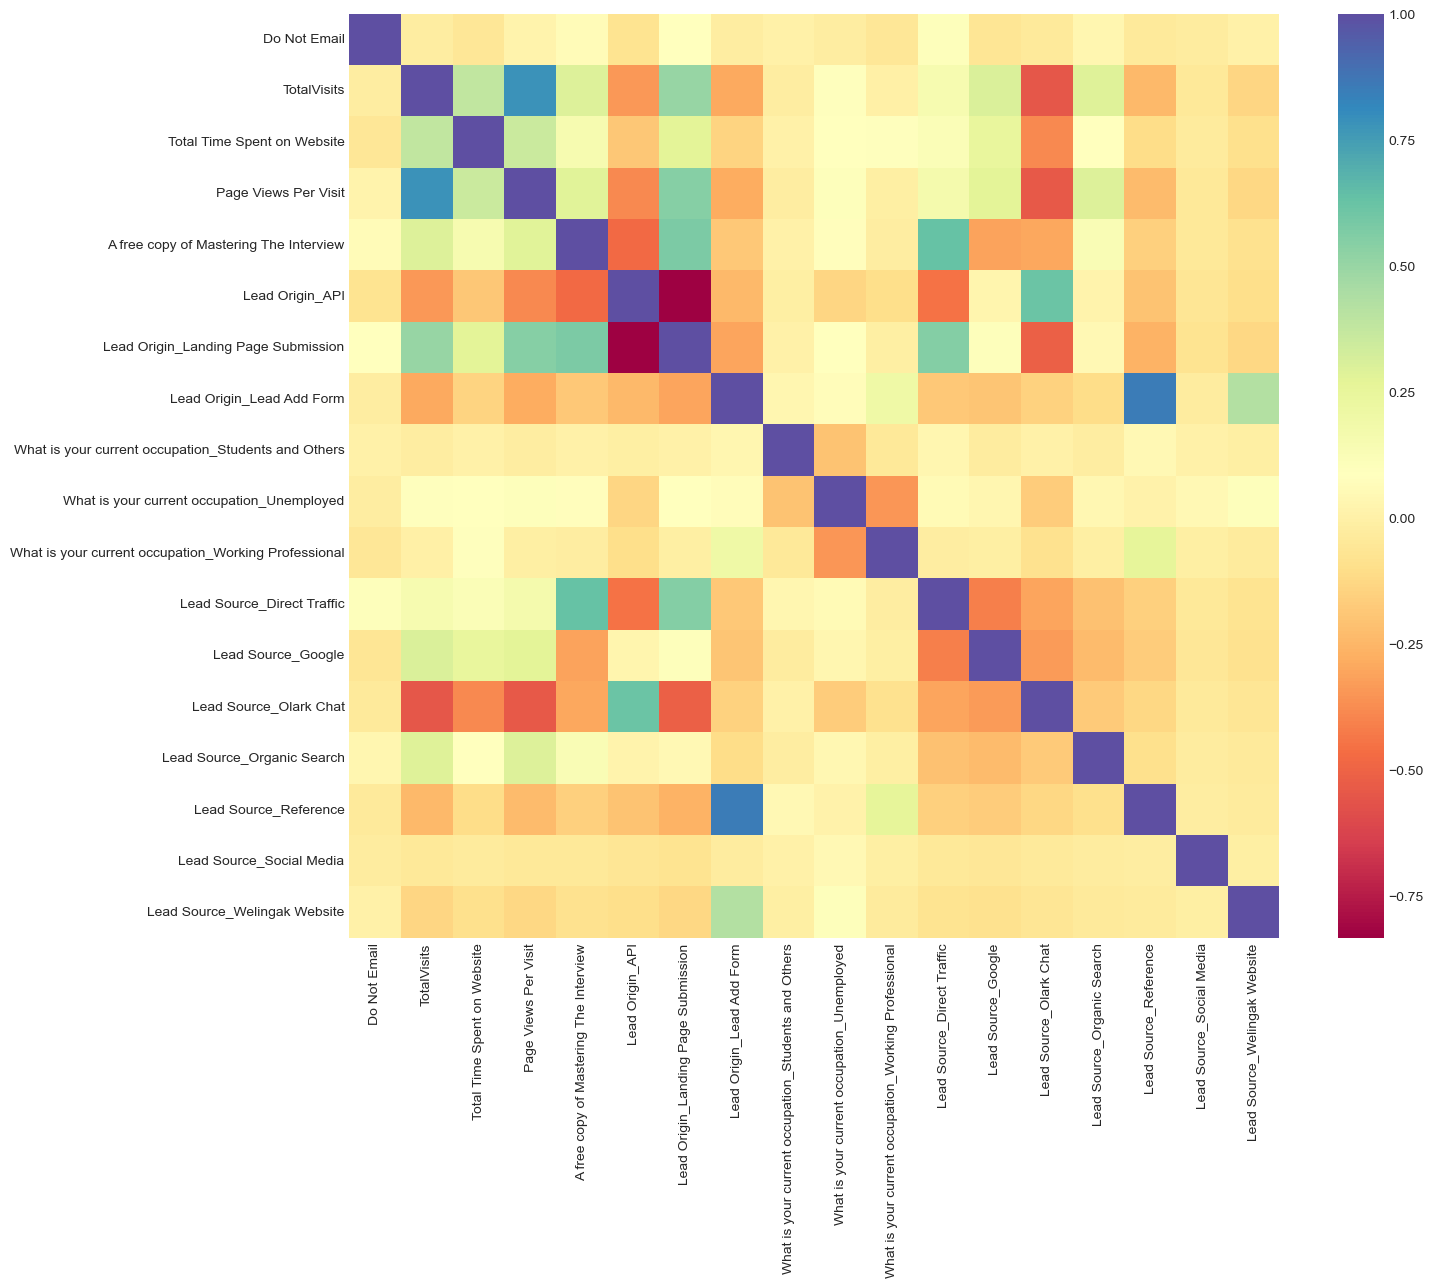

In [141]:
plt.figure(figsize=(15,12))
sns.heatmap(correlation, cmap='Spectral')
plt.show()

In [228]:
# Doing Scaling for the data 

scaler = StandardScaler()
numeric_cols = x_train.select_dtypes(include=['float', 'int']).columns

x_train[numeric_cols] = scaler.fit_transform(x_train[numeric_cols])
x_train.head()

,Do Not Email,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_API,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,What is your current occupation_Students and Others,What is your current occupation_Unemployed,...,Lead Source_1,Lead Source_2,Lead Source_3,Lead Source_4,Lead Source_5,Lead Source_6,Lead Source_7,What is your current occupation_1,What is your current occupation_2,What is your current occupation_3
5602,-0.30,0.08,0.56,0.45,1.52,0,1,0,0,1,...,0,0,1,0,0,0,0,0,1,0
5036,-0.30,-1.20,-0.86,-1.14,-0.66,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
8970,-0.30,-0.77,-0.27,-0.61,-0.66,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
5328,-0.30,-0.35,-0.46,-0.08,-0.66,0,1,0,0,1,...,1,0,0,0,0,0,0,0,1,0
1929,-0.30,0.93,-0.47,1.51,-0.66,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [143]:
x_train.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Lead Origin_API',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'What is your current occupation_Students and Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website'],
      dtype='object')

In [148]:
categorical_columns = x_train.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)


Categorical Columns: Index(['Lead Origin', 'Lead Source', 'What is your current occupation'], dtype='object')


In [149]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_columns:
    x_train[col] = le.fit_transform(x_train[col])
    x_test[col] = le.transform(x_test[col])


In [150]:
x_train = pd.get_dummies(x_train, columns=categorical_columns, drop_first=True)
x_test = pd.get_dummies(x_test, columns=categorical_columns, drop_first=True)


In [151]:
x_train, x_test = x_train.align(x_test, join='left', axis=1)
x_test = x_test.fillna(0)  # Fill missing columns in x_test with 0


In [152]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
rfe = RFE(estimator=lr, n_features_to_select=21)
rfe = rfe.fit(x_train, y_train)

selected_features = x_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Students and Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Lead Origin_1', 'Lead Origin_2',
       'Lead Origin_3', 'Lead Source_2', 'Lead Source_4', 'Lead Source_7',
       'What is your current occupation_1',
       'What is your current occupation_2',
       'What is your current occupation_3'],
      dtype='object')


In [153]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('Do Not Email', True, 1),
 ('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('A free copy of Mastering The Interview', False, 11),
 ('Lead Origin_API', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('What is your current occupation_Students and Others', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Lead Source_Direct Traffic', False, 4),
 ('Lead Source_Google', False, 8),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 6),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Social Media', False, 5),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Origin_1', True, 1),
 ('Lead Origin_2', True, 1),
 ('Lead Origin_3', True, 1),
 ('Lead Source_1', False, 10),
 ('Lead Source_2', True, 1),
 ('Lead Source_3', False, 7),
 ('Lead Source_4', True, 1),
 ('Lea

In [154]:
#list of all columns supported by RFE

cols = x_train.columns[rfe.support_]
cols

Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Students and Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Welingak Website', 'Lead Origin_1', 'Lead Origin_2',
       'Lead Origin_3', 'Lead Source_2', 'Lead Source_4', 'Lead Source_7',
       'What is your current occupation_1',
       'What is your current occupation_2',
       'What is your current occupation_3'],
      dtype='object')

In [156]:
print(len(x.columns))       # Length of column names
print(len(rfe.support_))    # Length of support values
print(len(rfe.ranking_))    # Length of ranking values


21
31
31


In [160]:
# Re-align columns to ensure correct length
x_train = pd.get_dummies(x_train)  # If you used one-hot encoding, for example

# Re-run RFE
rfe = RFE(estimator=lr, n_features_to_select=21)
rfe = rfe.fit(x_train, y_train)


In [163]:
print(len(x.columns))       # Length of column names
print(len(rfe.support_))    # Length of support values
print(len(rfe.ranking_))    # Length of ranking valu



21
31
31


In [164]:
# Apply preprocessing, if needed
x_train = pd.get_dummies(x_train)  # For one-hot encoding or any other transformation



In [165]:
# Ensure that preprocessing is applied
x_train = pd.get_dummies(x_train)  # Apply one-hot encoding or any necessary transformations

# Check the shape again after preprocessing
print(x_train.shape)

# Now apply RFE
rfe = RFE(estimator=lr, n_features_to_select=21)
rfe = rfe.fit(x_train, y_train)



(6141, 31)


In [168]:
# Apply one-hot encoding or any other transformations
x_train = pd.get_dummies(x_train)

# Check the shape of x_train after preprocessing
print(x_train.shape)  # This will give you the number of columns

# Now apply RFE to select features
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe = rfe.fit(x_train, y_train)

# Check lengths of all arrays
print(f"Columns: {len(x_train.columns)}")
print(f"Support: {len(rfe.support_)}")
print(f"Ranking: {len(rfe.ranking_)}")

# Make sure they match


(6141, 31)
Columns: 31
Support: 31
Ranking: 31


In [174]:
print(x_train.columns)  # To see what columns are in x_train


Index(['Do Not Email', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'A free copy of Mastering The Interview',
       'Lead Origin_API', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form',
       'What is your current occupation_Students and Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Lead Source_Direct Traffic', 'Lead Source_Google',
       'Lead Source_Olark Chat', 'Lead Source_Organic Search',
       'Lead Source_Reference', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Lead Origin_1', 'Lead Origin_2',
       'Lead Origin_3', 'Lead Source_1', 'Lead Source_2', 'Lead Source_3',
       'Lead Source_4', 'Lead Source_5', 'Lead Source_6', 'Lead Source_7',
       'What is your current occupation_1',
       'What is your current occupation_2',
       'What is your current occupation_3'],
      dtype='object')


In [175]:
# Ensure you're selecting only the columns for which RFE has a corresponding rank
# We are selecting the columns based on the support array.
selected_columns = x_train.columns  # Get all columns initially

# Create the DataFrame for RFE output
rfe_leads = pd.DataFrame({
    'Predictors': selected_columns,      # All columns in x_train
    'Status': rfe.support_,               # Whether feature is selected (True/False)
    'Rank': rfe.ranking_                  # Ranking of the features
})

# Display the result
print(rfe_leads)


                                           Predictors  Status  Rank
0                                        Do Not Email   False     4
1                                         TotalVisits   False     7
2                         Total Time Spent on Website    True     1
3                                Page Views Per Visit   False    15
4              A free copy of Mastering The Interview   False    17
5                                     Lead Origin_API    True     1
6                 Lead Origin_Landing Page Submission   False     3
7                           Lead Origin_Lead Add Form    True     1
8   What is your current occupation_Students and O...    True     1
9          What is your current occupation_Unemployed    True     1
10  What is your current occupation_Working Profes...    True     1
11                         Lead Source_Direct Traffic   False    10
12                                 Lead Source_Google   False    14
13                             Lead Source_Olark

In [176]:
# Print the support and ranking values to debug
print("Support:", rfe.support_)
print("Ranking:", rfe.ranking_)


Support: [False False  True False False  True False  True  True  True  True False
 False  True False False False  True  True  True False False  True False
 False False False  True  True  True  True]
Ranking: [ 4  7  1 15 17  1  3  1  1  1  1 10 14  1 12  6 11  1  1  1  2 16  1 13
  5  9  8  1  1  1  1]


In [177]:
# Create the DataFrame for RFE output using the selected columns
rfe_leads = pd.DataFrame({
    'Predictors': x_train.columns,  # All columns in x_train
    'Status': rfe.support_,         # Whether feature is selected (True/False)
    'Rank': rfe.ranking_            # Ranking of the features
})

# Display the result
print(rfe_leads)


                                           Predictors  Status  Rank
0                                        Do Not Email   False     4
1                                         TotalVisits   False     7
2                         Total Time Spent on Website    True     1
3                                Page Views Per Visit   False    15
4              A free copy of Mastering The Interview   False    17
5                                     Lead Origin_API    True     1
6                 Lead Origin_Landing Page Submission   False     3
7                           Lead Origin_Lead Add Form    True     1
8   What is your current occupation_Students and O...    True     1
9          What is your current occupation_Unemployed    True     1
10  What is your current occupation_Working Profes...    True     1
11                         Lead Source_Direct Traffic   False    10
12                                 Lead Source_Google   False    14
13                             Lead Source_Olark

In [178]:
selected_features = rfe_leads[rfe_leads['Status'] == True]
print(selected_features)


                                           Predictors  Status  Rank
2                         Total Time Spent on Website    True     1
5                                     Lead Origin_API    True     1
7                           Lead Origin_Lead Add Form    True     1
8   What is your current occupation_Students and O...    True     1
9          What is your current occupation_Unemployed    True     1
10  What is your current occupation_Working Profes...    True     1
13                             Lead Source_Olark Chat    True     1
17                       Lead Source_Welingak Website    True     1
18                                      Lead Origin_1    True     1
19                                      Lead Origin_2    True     1
22                                      Lead Source_2    True     1
27                                      Lead Source_7    True     1
28                  What is your current occupation_1    True     1
29                  What is your current occupat

In [179]:
# Assuming 'x' is your feature set (excluding the target variable)
# Ensure that rfe has been fitted properly
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, n_features_to_select=15)  # You can choose the number of features
rfe = rfe.fit(x_train, y_train)  # Assuming x_train and y_train are your training features and target

# Create a DataFrame for selected features with their rank and selection status
rfe_leads = pd.DataFrame({
    'Predictors': x_train.columns,    # Feature names
    'Status': rfe.support_,           # Whether the feature was selected (True/False)
    'Rank': rfe.ranking_              # Ranking of the feature
})

# Display the DataFrame with feature status and rank
print(rfe_leads)


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

                                           Predictors  Status  Rank
0                                        Do Not Email   False     4
1                                         TotalVisits   False     7
2                         Total Time Spent on Website    True     1
3                                Page Views Per Visit   False    15
4              A free copy of Mastering The Interview   False    17
5                                     Lead Origin_API    True     1
6                 Lead Origin_Landing Page Submission   False     3
7                           Lead Origin_Lead Add Form    True     1
8   What is your current occupation_Students and O...    True     1
9          What is your current occupation_Unemployed    True     1
10  What is your current occupation_Working Profes...    True     1
11                         Lead Source_Direct Traffic   False    10
12                                 Lead Source_Google   False    14
13                             Lead Source_Olark

In [180]:
rfe_leads.sort_values(by = 'Rank')

,Predictors,Status,Rank
30,What is your current occupation_3,True,1
18,Lead Origin_1,True,1
13,Lead Source_Olark Chat,True,1
19,Lead Origin_2,True,1
10,What is your current occupation_Working Profes...,True,1
9,What is your current occupation_Unemployed,True,1
29,What is your current occupation_2,True,1
8,What is your current occupation_Students and O...,True,1
5,Lead Origin_API,True,1
22,Lead Source_2,True,1


In [181]:
def get_vif(df):
    vif_pred =  pd.DataFrame()
    vif_pred['Features']  = x_train[cols].columns
    
    vif_pred['VIF_Value'] = [variance_inflation_factor(x_train[cols].values, v) for v in range(x_train[cols].shape[1])]
    vif_pred['VIF_Value'] = round(vif_pred['VIF_Value'], 2) 
    
    vif_pred = vif_pred.sort_values(by = 'VIF_Value', ascending = False)
    vif_pred = vif_pred.reset_index(drop=True)
    return vif_pred

# Model 1

In [183]:
x_train_sm = sm.add_constant(x_train[cols])
logr_m1 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6127
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2746.8
Date:                Mon, 16 Dec 2024   Deviance:                       5493.5
Time:                        21:00:34   Pearson chi2:                 7.49e+03
No. Iterations:                    55   Pseudo R-squ. (CS):             0.3508
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0077      0.146     -6.901      0.000      -1.294      -0.721
Do Not Email                                            -0.3063      0.043     -7.060      0.000      -0.391      -0.221
TotalVisits                                              0.2269      0.046      4.982      0.000       0.138       0.316
Total Time Spent on Website                              1.0807      0.040     27.280      0.000       1.003       1.158
Lead Origin_API                                         -1.1254      0.144     -7.842      0.000      -1.407      -0.844
Lead Origin_Landing Page Submission                     -0.6878      0.073     -9.469      0.000      -0.830      -0.545
Lead Origin_Lead Add Form                                1.7312      0.285      6.067      0.000       1.172       2.290
What is your current occupation_Students and Others      0.6173      0.101      6.106      0.000       0.419       0.815
What is your current occupation_Unemployed               0.6726      0.043     15.653      0.000       0.588       0.757
What is your current occupation_Working Professional     1.8494      0.097     19.059      0.000       1.659       2.040
Lead Source_Olark Chat                                   0.5840      0.066      8.840      0.000       0.455       0.713
Lead Source_Reference                                   -0.8169      0.669     -1.222      0.222      -2.128       0.494
Lead Source_Welingak Website                             0.6227      0.480      1.297      0.195      -0.318       1.563
Lead Origin_1                                           -0.6878      0.073     -9.469      0.000      -0.830      -0.545
Lead Origin_2                                            1.7312      0.285      6.067      0.000       1.172       2.290
Lead Origin_3                                           -0.9257      0.322     -2.879      0.004      -1.556      -0.295
Lead Source_2                                            0.5840      0.066      8.840      0.000       0.455       0.713
Lead Source_4                                           -0.5122      0.328     -1.561      0.118      -1.155       0.131
Lead Source_7                                            0.6227      0.480      1.297      0.195      -0.318       1.563
What is your current occupation_1                        0.6173      0.101      6.106      0.000       0.419       0.815
What is your current occupation_2                        0.6726      0.043     15.653      0.000       0.588       0.757
What is your current occupation_3                        1.8494      0.097     19.059      0.000       1.659       2.040
==========================================================

In [185]:
cols = cols.drop('Lead Source_Reference', 1)

In [186]:
get_vif(cols)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF_Value
0,Lead Source_Welingak Website,inf
1,Lead Source_Olark Chat,inf
2,What is your current occupation_2,inf
3,What is your current occupation_1,inf
4,Lead Source_7,inf
5,Lead Source_2,inf
6,Lead Origin_2,inf
7,Lead Origin_1,inf
8,What is your current occupation_3,inf
9,What is your current occupation_Working Profes...,inf


# Model 2

In [187]:
x_train_sm = sm.add_constant(x_train[cols])
logr_m2 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6128
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2747.6
Date:                Mon, 16 Dec 2024   Deviance:                       5495.2
Time:                        21:03:29   Pearson chi2:                 7.61e+03
No. Iterations:                    40   Pseudo R-squ. (CS):             0.3506
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1045      0.123     -9.016      0.000      -1.345      -0.864
Do Not Email                                            -0.3018      0.043     -7.022      0.000      -0.386      -0.218
TotalVisits                                              0.2263      0.046      4.972      0.000       0.137       0.315
Total Time Spent on Website                              1.0807      0.040     27.281      0.000       1.003       1.158
Lead Origin_API                                         -1.0371      0.123     -8.418      0.000      -1.279      -0.796
Lead Origin_Landing Page Submission                     -0.6398      0.061    -10.502      0.000      -0.759      -0.520
Lead Origin_Lead Add Form                                1.4104      0.102     13.808      0.000       1.210       1.611
What is your current occupation_Students and Others      0.6171      0.101      6.098      0.000       0.419       0.815
What is your current occupation_Unemployed               0.6731      0.043     15.672      0.000       0.589       0.757
What is your current occupation_Working Professional     1.8478      0.097     19.039      0.000       1.658       2.038
Lead Source_Olark Chat                                   0.5880      0.066      8.909      0.000       0.459       0.717
Lead Source_Welingak Website                             0.9899      0.371      2.670      0.008       0.263       1.717
Lead Origin_1                                           -0.6398      0.061    -10.502      0.000      -0.759      -0.520
Lead Origin_2                                            1.4104      0.102     13.808      0.000       1.210       1.611
Lead Origin_3                                           -0.8380      0.314     -2.670      0.008      -1.453      -0.223
Lead Source_2                                            0.5880      0.066      8.909      0.000       0.459       0.717
Lead Source_4                                           -0.3035      0.271     -1.118      0.263      -0.835       0.228
Lead Source_7                                            0.9899      0.371      2.670      0.008       0.263       1.717
What is your current occupation_1                        0.6171      0.101      6.098      0.000       0.419       0.815
What is your current occupation_2                        0.6731      0.043     15.672      0.000       0.589       0.757
What is your current occupation_3                        1.8478      0.097     19.039      0.000       1.658       2.038
========================================================================================================================
"""

In [189]:
cols = cols.drop('Lead Source_4', 1)

In [190]:
get_vif(cols)

C:\ProgramData\anaconda3\Lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


,Features,VIF_Value
0,Lead Source_Olark Chat,inf
1,Lead Source_Welingak Website,inf
2,What is your current occupation_2,inf
3,What is your current occupation_1,inf
4,Lead Source_7,inf
5,Lead Source_2,inf
6,Lead Origin_2,inf
7,Lead Origin_1,inf
8,What is your current occupation_3,inf
9,What is your current occupation_Working Profes...,inf


# Model 3

In [191]:
x_train_sm = sm.add_constant(x_train[cols])
logr_m3 = sm.GLM(y_train, x_train_sm, family = sm.families.Binomial())
res = logr_m3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6141
Model:                            GLM   Df Residuals:                     6129
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2748.2
Date:                Mon, 16 Dec 2024   Deviance:                       5496.4
Time:                        21:04:25   Pearson chi2:                 7.54e+03
No. Iterations:                     8   Pseudo R-squ. (CS):             0.3505
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1183      0.122     -9.159      0.000      -1.358      -0.879
Do Not Email                                            -0.3050      0.043     -7.088      0.000      -0.389      -0.221
TotalVisits                                              0.2246      0.045      4.940      0.000       0.136       0.314
Total Time Spent on Website                              1.0813      0.040     27.289      0.000       1.004       1.159
Lead Origin_API                                         -1.0389      0.123     -8.418      0.000      -1.281      -0.797
Lead Origin_Landing Page Submission                     -0.6342      0.061    -10.427      0.000      -0.753      -0.515
Lead Origin_Lead Add Form                                1.3947      0.101     13.830      0.000       1.197       1.592
What is your current occupation_Students and Others      0.6199      0.101      6.131      0.000       0.422       0.818
What is your current occupation_Unemployed               0.6740      0.043     15.696      0.000       0.590       0.758
What is your current occupation_Working Professional     1.8498      0.097     19.062      0.000       1.660       2.040
Lead Source_Olark Chat                                   0.5942      0.066      9.031      0.000       0.465       0.723
Lead Source_Welingak Website                             1.0117      0.370      2.733      0.006       0.286       1.737
Lead Origin_1                                           -0.6342      0.061    -10.427      0.000      -0.753      -0.515
Lead Origin_2                                            1.3947      0.101     13.830      0.000       1.197       1.592
Lead Origin_3                                           -0.8400      0.315     -2.670      0.008      -1.457      -0.223
Lead Source_2                                            0.5942      0.066      9.031      0.000       0.465       0.723
Lead Source_7                                            1.0117      0.370      2.733      0.006       0.286       1.737
What is your current occupation_1                        0.6199      0.101      6.131      0.000       0.422       0.818
What is your current occupation_2                        0.6740      0.043     15.696      0.000       0.590       0.758
What is your current occupation_3                        1.8498      0.097     19.062      0.000       1.660       2.040
========================================================================================================================
"""

In [192]:
pd.options.display.float_format = '{:.2f}'.format
model_params = res.params[1:]
model_params

Do Not Email                                           -0.31
TotalVisits                                             0.22
Total Time Spent on Website                             1.08
Lead Origin_API                                        -1.04
Lead Origin_Landing Page Submission                    -0.63
Lead Origin_Lead Add Form                               1.39
What is your current occupation_Students and Others     0.62
What is your current occupation_Unemployed              0.67
What is your current occupation_Working Professional    1.85
Lead Source_Olark Chat                                  0.59
Lead Source_Welingak Website                            1.01
Lead Origin_1                                          -0.63
Lead Origin_2                                           1.39
Lead Origin_3                                          -0.84
Lead Source_2                                           0.59
Lead Source_7                                           1.01
What is your current occ

In [211]:
# We will now evaluate a RELATIVE COEFFICIENT value for all the above features (wrt to highest coeff variable)
# Calculate relative feature importance
feature_imp = 100.0 * (model_params / model_params.max())


In [213]:
#sorting all the values

sorted_imp = np.argsort(feature_imp, kind='quicksort', order='list of str')
sorted_implogr_m2 = sm.GLM(y_train, x_train_sm, family=sm.families.Binomial())
sorted_imp = np.argsort(feature_imp)

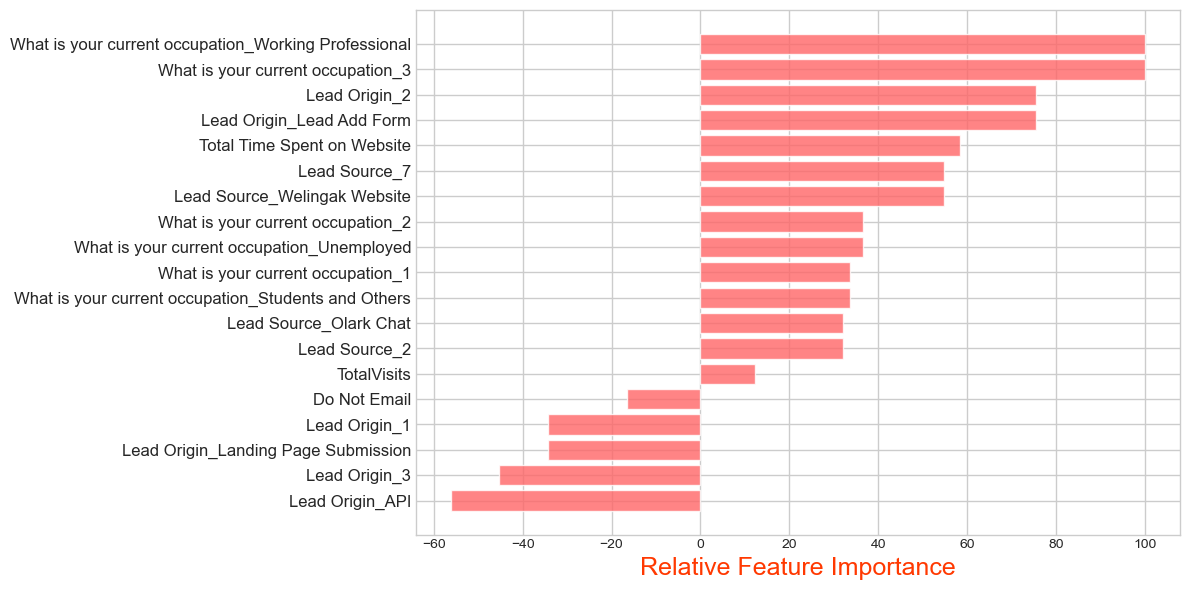

In [214]:
#plot the features importance

p = np.arange(sorted_imp.shape[0]) + 0.5

fig, ax = plt.subplots(figsize=(12, 6))
ax.barh(p, feature_imp[sorted_imp], align='center', color='#ff6667', alpha=0.8)
ax.set_yticks(p)
ax.set_yticklabels(np.array(x_train[cols].columns)[sorted_imp], fontsize=12)
ax.set_xlabel('Relative Feature Importance', fontsize=18, color='#ff3901')

plt.tight_layout()
plt.show()



In [197]:
# extracting all the predicted values from training set

y_train_pred = res.predict(x_train_sm)
y_train_pred[:10]

5602   0.42
5036   0.83
8970   0.23
5328   0.18
1929   0.07
7540   0.02
7029   0.13
7293   0.07
3885   0.80
791    0.46
dtype: float64

In [198]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.42106745, 0.8346447 , 0.23427322, 0.17986944, 0.06977649,
       0.02065817, 0.12881266, 0.07004277, 0.79773053, 0.46056718])

In [199]:
y_train_pred_final = pd.DataFrame({'Converted' : y_train.values, 'Converted_prob' : y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.42,5602
1,1,0.83,5036
2,0,0.23,8970
3,0,0.18,5328
4,0,0.07,1929


Creating a new column as "Predicted" with 1 if the probability > 0.5, else 0

In [219]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x : 1 if x>0.5 else 0)

#check the head again
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.42,5602,0,1,1,1,1,1,0,0,0,0,0
1,1,0.83,5036,1,1,1,1,1,1,1,1,1,1,0
2,0,0.23,8970,0,1,1,1,0,0,0,0,0,0,0
3,0,0.18,5328,0,1,1,0,0,0,0,0,0,0,0
4,0,0.07,1929,0,1,0,0,0,0,0,0,0,0,0


In [220]:
print (classification_report(y_train_pred_final.Converted, y_train_pred_final.Predicted))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85      3817
           1       0.79      0.65      0.71      2324

    accuracy                           0.80      6141
   macro avg       0.80      0.77      0.78      6141
weighted avg       0.80      0.80      0.80      6141



In [221]:
def plot_cm(actual, predicted):

    cm = confusion_matrix(actual, predicted)
    plt.clf()
    sns.set_style('white')
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Pastel2)
    classname = ['Negative', 'Positive']
    plt.title('CONFUSION MATRIX', fontsize=20, color= '#ff4941')
    plt.ylabel('Actual Converted', fontsize = 16, color= "coral")
    plt.xlabel('Predicted Converted', fontsize = 16, color= "coral")
    
    ticks= np.arange(len(classname))
    plt.xticks(ticks, classname, fontsize=12)
    plt.yticks(ticks, classname, fontsize=12)
    
    met = [['TN', 'FP'], ['FN', 'TP']]
    
    for i in range(2):
        for j in range(2):
            plt.text(j,i, str(met[i][j])+" = "+str(cm[i][j]), fontsize=12, ha='center')
    plt.show()

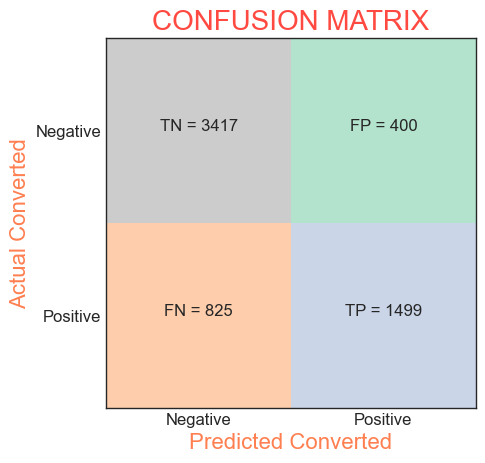

In [222]:
plot_cm(y_train_pred_final.Converted, y_train_pred_final.Predicted)

In [223]:
def get_metrics(actual, predicted) :
    confusion = confusion_matrix(actual, predicted)
    
    #evaluating accuracy
    Accuracy = metrics.accuracy_score(actual, predicted)
    
    TP = confusion[1,1] 
    TN = confusion[0,0] 
    FP = confusion[0,1] 
    FN = confusion[1,0]    
    
    #----------------other metrics------------------#
    
    #sensitivity
    Sensitivity = TP/float(TP+FN)
    
    #specificity
    Specificity = TN/float(TN+FP)
    
    #Precision
    Precision = TP/float(TP+FP)
    
    #Recall
    Recall = TP/float(TP+FN)
    
    #False Positive Rate 
    FPR = FP/(TN+FP)
    
    #Positive predictive value
    PPV = TP/float(TP+FP)
    
    #Negative predictive value
    NPV = TN/float(TN+FN)
    
    #FI-SCORE (Harmonic mean of Precision-Recall)
    FI = 2*(Precision*Recall)/(Precision + Recall)
    
    
    #------------------print metrics-----------------#
    
    print (f'\nThe Confusion Matrix is \n \n {confusion}\n \n')
    print (f'The Accuracy is :  {round (Accuracy,2)} ({Accuracy})\n')
    print (f'The Sensitivity is :  {round (Sensitivity,2)} ({Sensitivity})\n')
    print (f'The Specificity is :  {round (Specificity,2)} ({Specificity})\n')
    print (f'The Precision is   :  {round (Precision,2)} ({Precision})\n')
    print (f'The Recall is      :  {round (Recall,2)} ({Recall}\n')
    print (f'The FI Score is    :  {round (FI,2)} ({FI}\n')
    print (f'The False Positive Rate : {round (FPR, 2)} ({FPR})\n')
    print (f'The Positive Predictive Value : {round (PPV, 2)} ({PPV})\n')
    print (f'The Negative Predictive Value : {round (NPV, 2)} ({NPV})\n')

In [224]:
get_metrics(y_train_pred_final.Converted, y_train_pred_final.Predicted)


The Confusion Matrix is 
 
 [[3417  400]
 [ 825 1499]]
 

The Accuracy is :  0.8 (0.8005210877707214)

The Sensitivity is :  0.65 (0.6450086058519794)

The Specificity is :  0.9 (0.8952056588944197)

The Precision is   :  0.79 (0.789362822538178)

The Recall is      :  0.65 (0.6450086058519794

The FI Score is    :  0.71 (0.7099218565001184

The False Positive Rate : 0.1 (0.1047943411055803)

The Positive Predictive Value : 0.79 (0.789362822538178)

The Negative Predictive Value : 0.81 (0.8055162659123055)



 ROC Curve¶
 
-ROC Curve mainly shows the trade-off between Sensitivity and Specificity

-It is always an inversely proportional relationship, if sensitivity increases, sensitivity decreases.

-An ROC curve which is closer to the left boundary than right, is considered more accurate

-In case ROC curve is closer to the 45 degree diagonal drawn, it is considered less accurate

In [225]:
#### We will now create a function to plot ROC curve with AUC score

def plot_roc(actual, pred) :
    
    #creating all the values required by the curve : False-pos rate, True-pos rate and the Threshold
    fpr, tpr, thresholds = metrics.roc_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False)
    plt.style.use('Solarize_Light2')

    #Calculating the auc (area under the curve) score
    auc = roc_auc_score(actual, pred)
    
    #Setting figure parameters
    plt.figure(figsize=(10,6))
    plt.style.use('seaborn-whitegrid')
    plt.plot(fpr, tpr, label='ROC Curve (area = %0.2f)' % auc, color='green')
    plt.plot([0,1], [0,1], 'r--') #for 45-deg line
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    
    #setting labels
    plt.xlabel('False Postive Rate')
    plt.ylabel('True Postive Rate')
    plt.title('ROC - Receiver operating characteristic')
    plt.legend(loc='lower right')
    plt.show()
    
   #no return needed 
    return None    

C:\Users\dhirs\AppData\Local\Temp\ipykernel_12092\4119979271.py:14: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


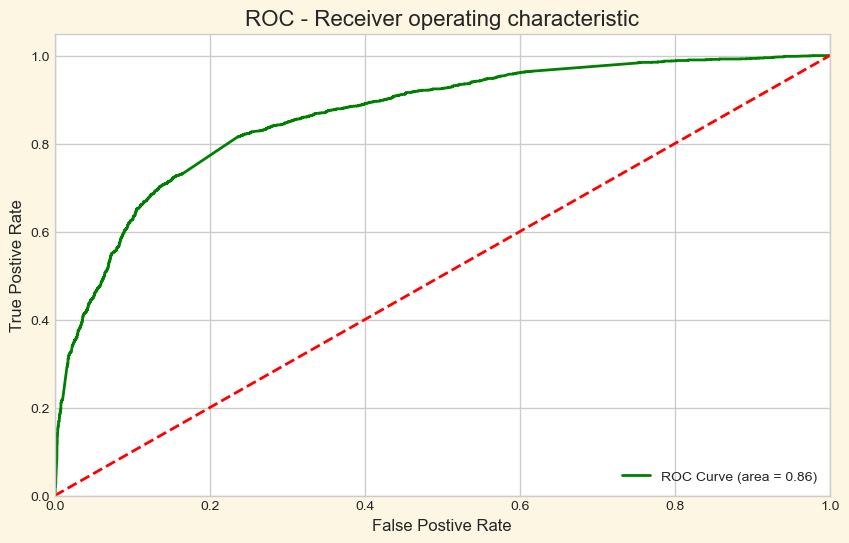

In [226]:
plot_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

Observation

ROC curve is closer to the left boundary, indicating model accuracy is quite high

Area under the curve (AUC) should be closer to maximum (i.e 1) and here we have it 0.86 which indicates a good predictive model

In [227]:
# Let us create 10 different columns with different probabilities and we will then select the most optimal one

nums = [float(n)/10 for n in range(10)]

for s in nums:
    y_train_pred_final[s] = y_train_pred_final['Converted_prob'].map(lambda n:1 if n>s else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.42,5602,0,1,1,1,1,1,0,0,0,0,0
1,1,0.83,5036,1,1,1,1,1,1,1,1,1,1,0
2,0,0.23,8970,0,1,1,1,0,0,0,0,0,0,0
3,0,0.18,5328,0,1,1,0,0,0,0,0,0,0,0
4,0,0.07,1929,0,1,0,0,0,0,0,0,0,0,0
